In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr

import env
import os
import explore
import wrangle 

Our Zillow scenario continues:

As a Codeup data science graduate, you want to show off your skills to the Zillow data science team in hopes of getting an interview for a position you saw pop up on LinkedIn. You thought it might look impressive to build an end-to-end project in which you use some of their Kaggle data to predict property values using some of their available features; who knows, you might even do some feature engineering to blow them away. Your goal is to predict the values of single unit properties using the observations from 2017.

In these exercises, you will run through the stages of exploration as you continue to work toward the above goal. Use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.













In [2]:
from wrangle import wrangle_zillow

In [3]:
train, validate, test = wrangle_zillow()

this file exists, reading csv


In [4]:
train.isnull().sum()

bedrooms       0
bathrooms      0
square_feet    0
home_value     0
yearbuilt      0
tax            0
county         0
dtype: int64

In [5]:
train.sample(10)

,bedrooms,bathrooms,square_feet,home_value,yearbuilt,tax,county
1153640,4,3.0,2464,534532.0,1985,6650.69,LA
453059,3,2.0,1414,346622.0,1972,3904.12,Ventura
113127,2,1.0,728,275868.0,1916,3312.01,LA
669342,3,2.0,2150,123319.0,1957,1652.30,LA
1710192,4,3.0,3850,832996.0,1993,10055.04,Orange
1058337,3,1.0,1142,83285.0,1947,1484.55,LA
1923168,4,3.0,1758,337303.0,1976,4282.09,LA
499020,2,1.0,936,176860.0,1924,2281.48,LA
876382,9,6.0,3794,1863962.0,1916,327.51,LA
515646,4,3.5,3739,310636.0,1976,3713.28,Orange


## 1. Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.


In [6]:
col = train.columns.to_list()

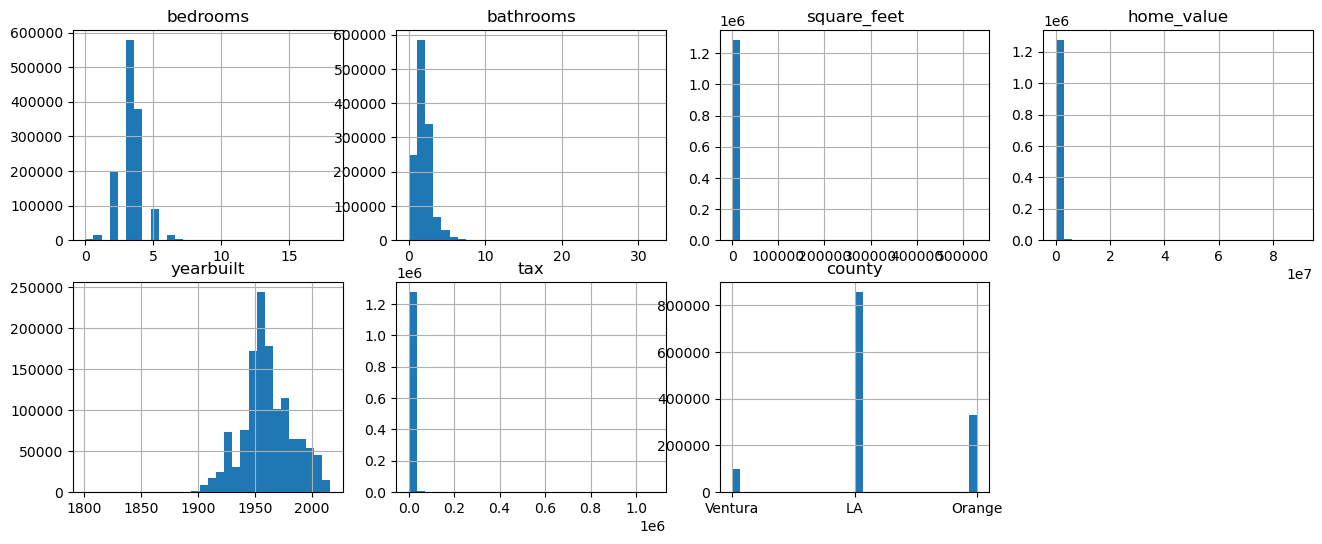

In [7]:
plt.figure(figsize=(16, 6))

for i, col in enumerate(train.columns):

    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 

    # Create subplot.
    plt.subplot(2, 4, plot_number)

    # Title with column name.
    plt.title(col)

    # Display histplot for column.
    train[col].hist(bins=30)

plt.show()

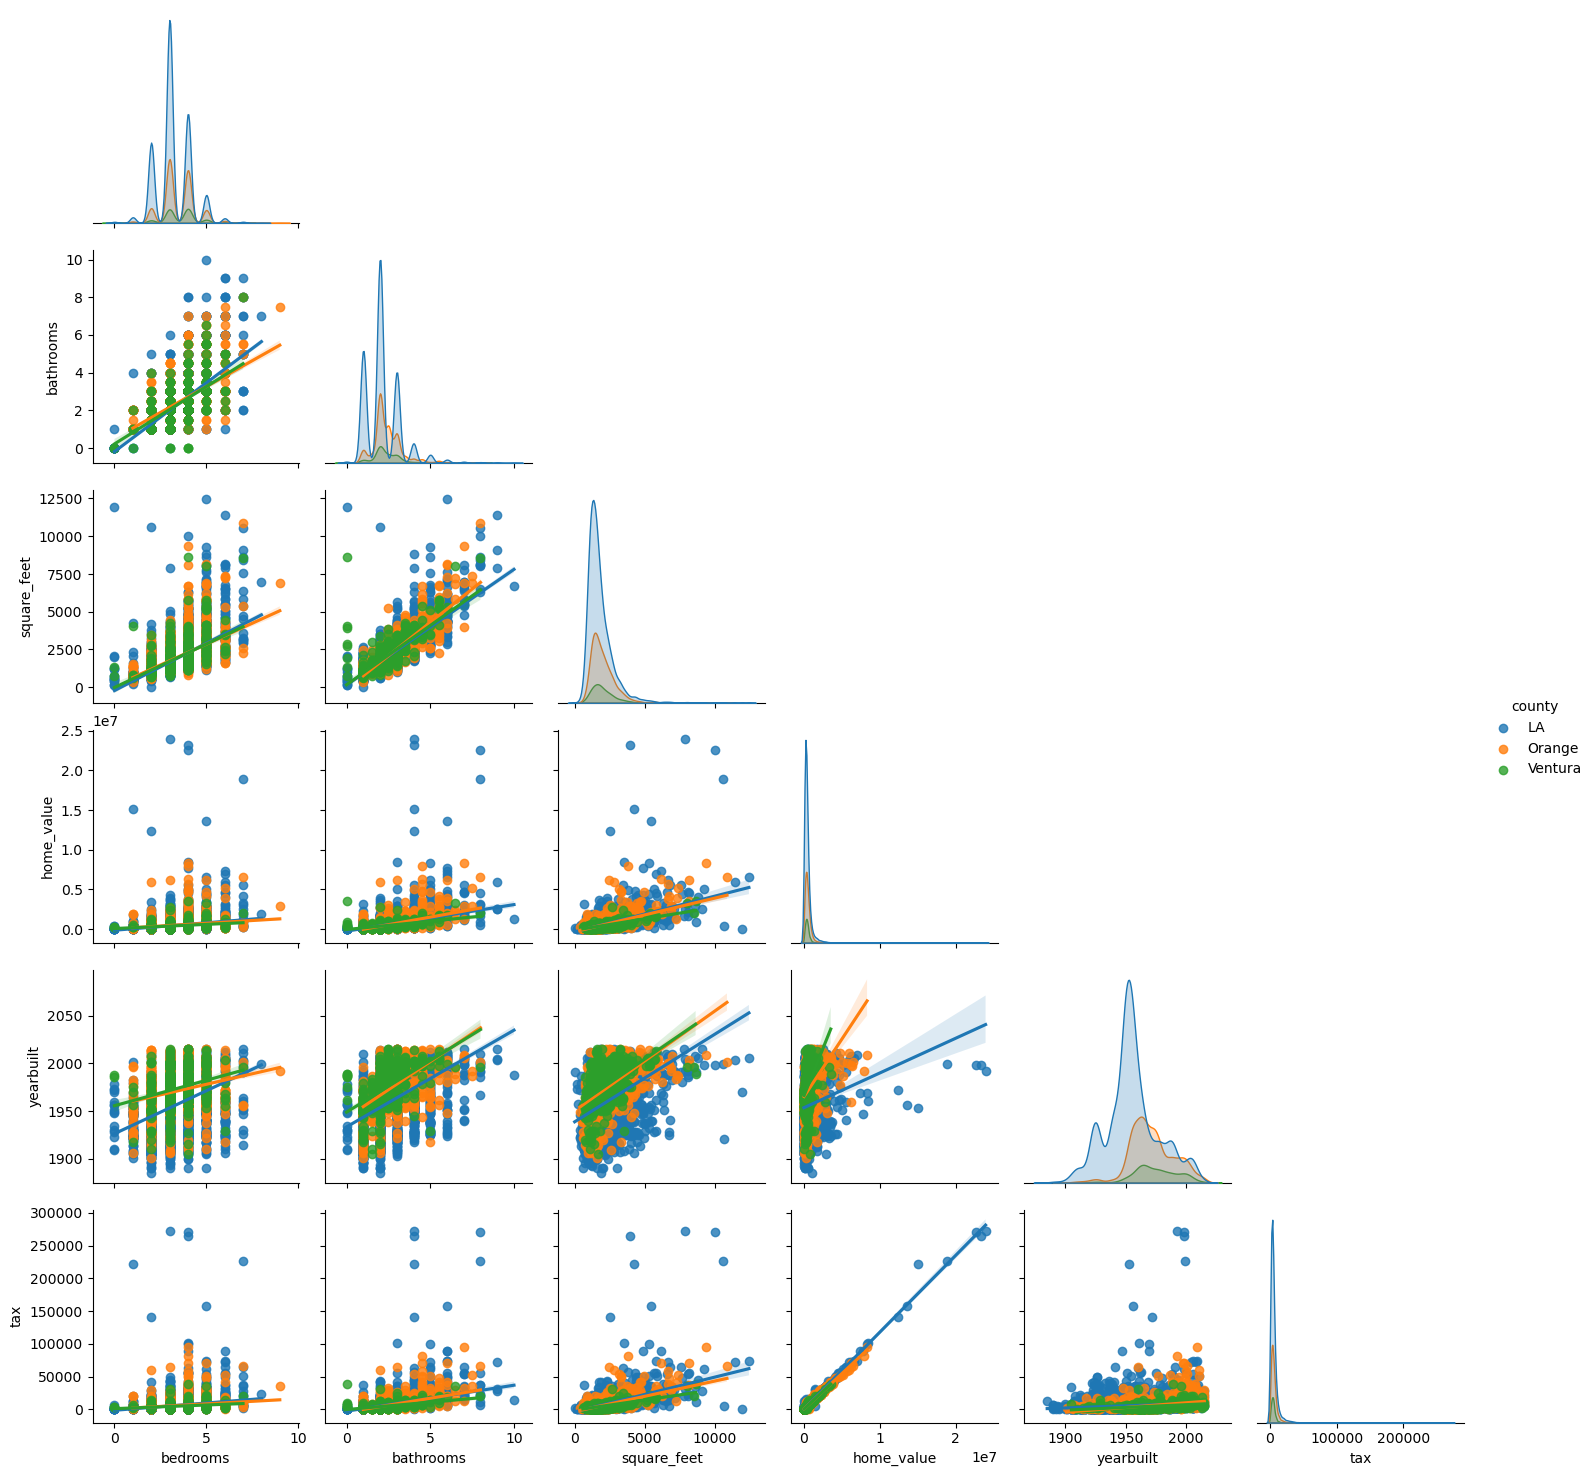

In [8]:
def plot_variable_pairs(df):
    sns.pairplot(train.sample(10000),kind='reg', hue='county', corner=True)
    plt.show()
plot_variable_pairs(train)

In [9]:
zillow_corr = train.drop(columns=['county']).corr()

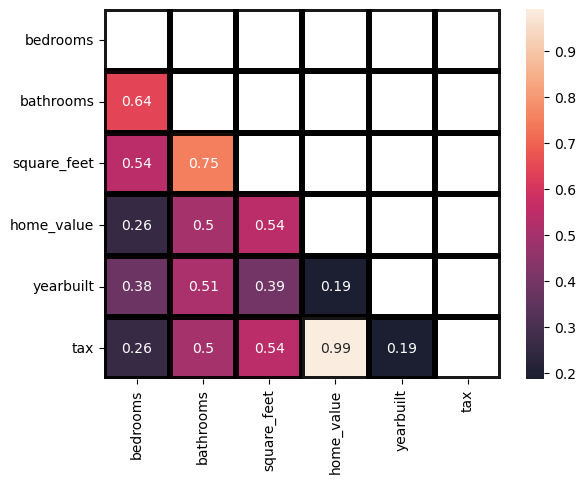

In [10]:
kwargs = {'alpha':.9,'linewidth':3, 'linestyle':'-', 
          'linecolor':'k','rasterized':False, 'edgecolor':'w', 
          'capstyle':'projecting',}
sns.heatmap(zillow_corr, cmap='rocket', annot=True, mask= np.triu(zillow_corr), **kwargs);


## 2. Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.


In [11]:
# create a new column with binned years for better visuals
train["decade"] = pd.cut(
    train["yearbuilt"], bins=range(1880, 2021, 10), labels=range(1880, 2020, 10)
)

train["sq_feet_binned"] = pd.cut(
    train["square_feet"], bins=range(0, 13001, 1000), labels=range(0, 13000, 1000)
)

train = train.dropna()

train["decade"] = train["decade"].astype(int)
train["sq_feet_binned"] = train["sq_feet_binned"].astype(int)

In [12]:
cont = ["square_feet", "home_value", "tax"]
cat = ["decade", "county", "bathrooms", "bedrooms", "sq_feet_binned"]

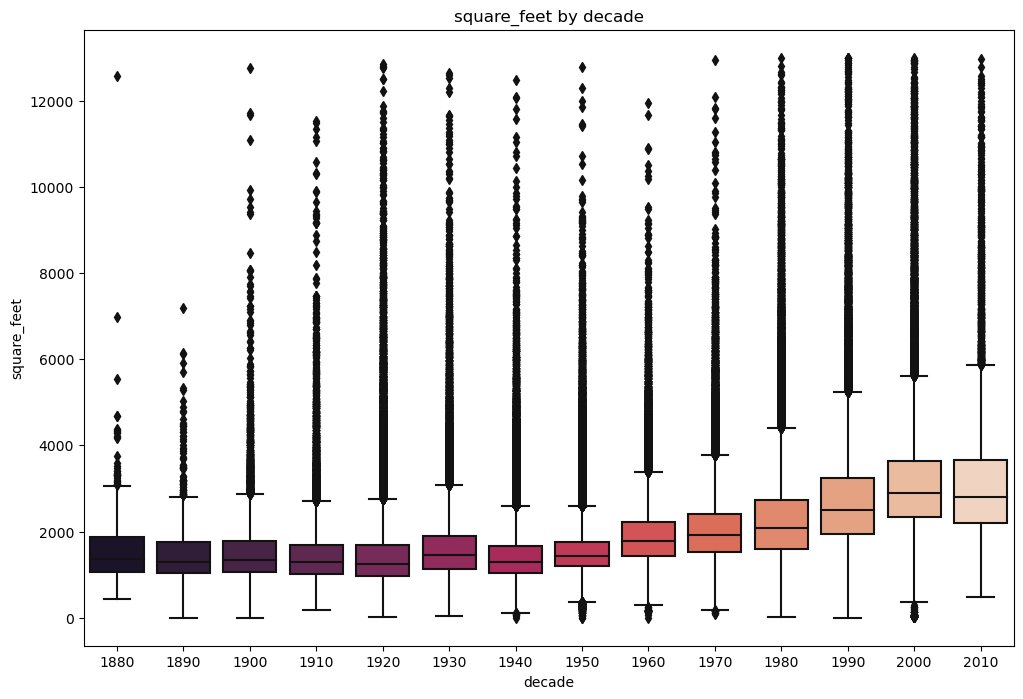

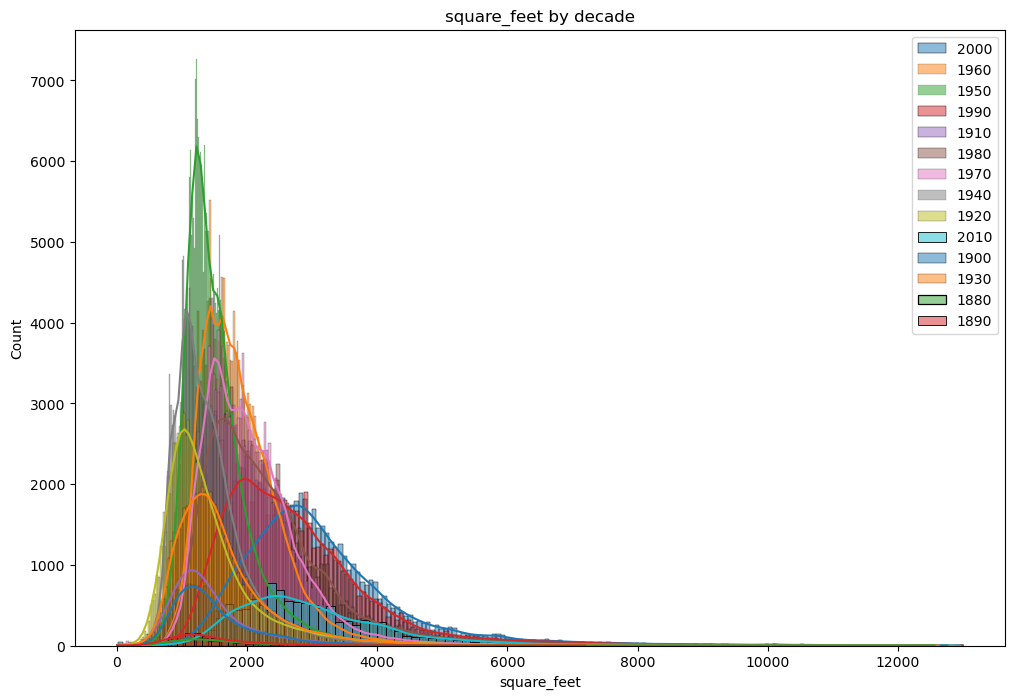

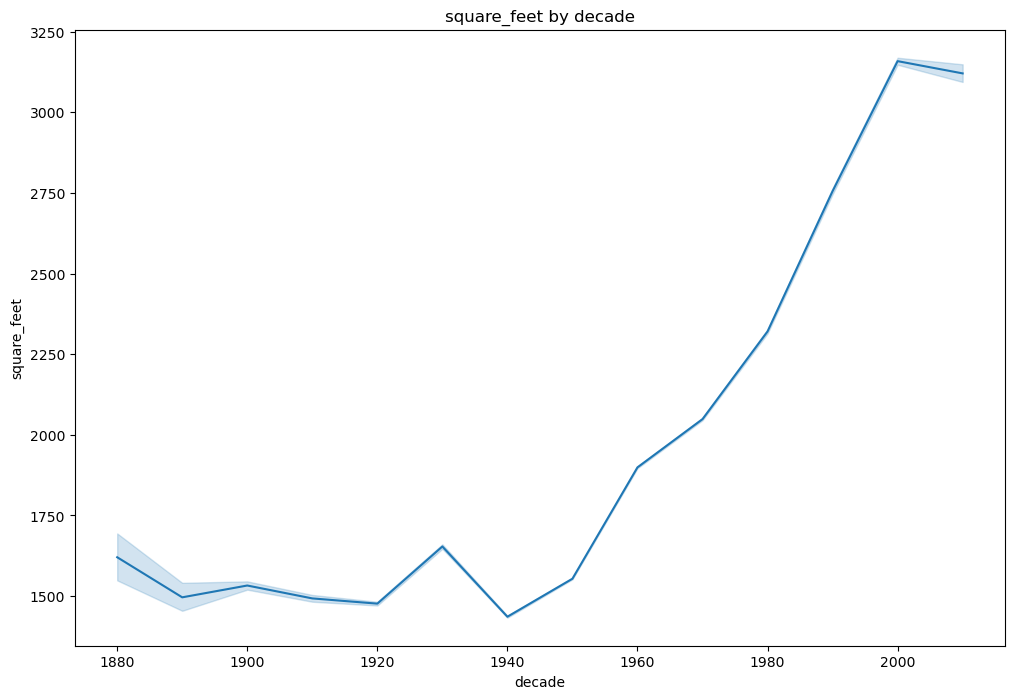

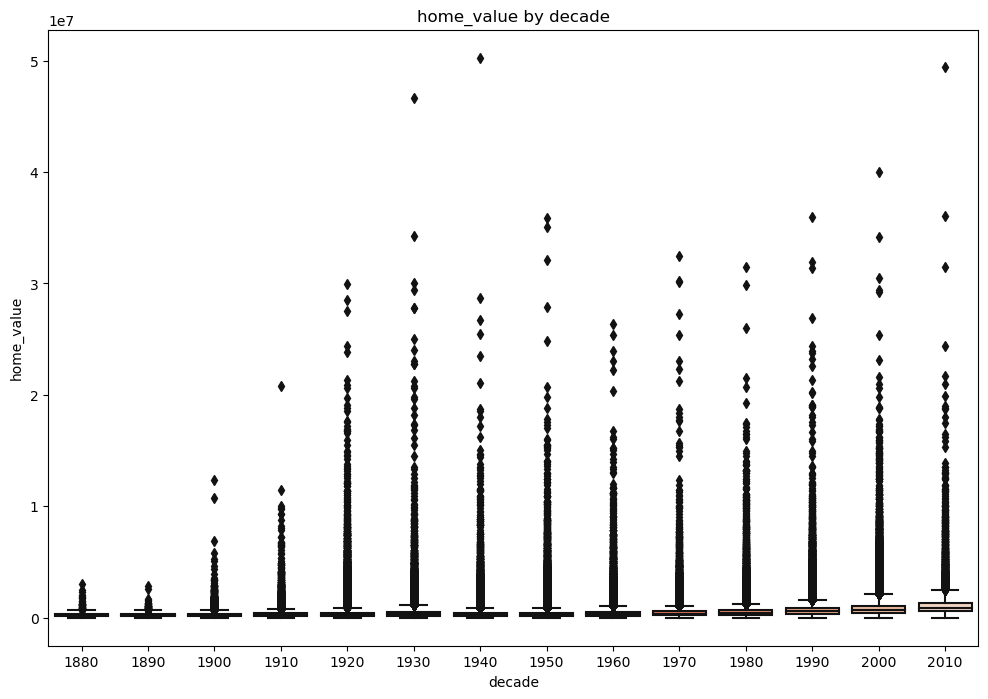

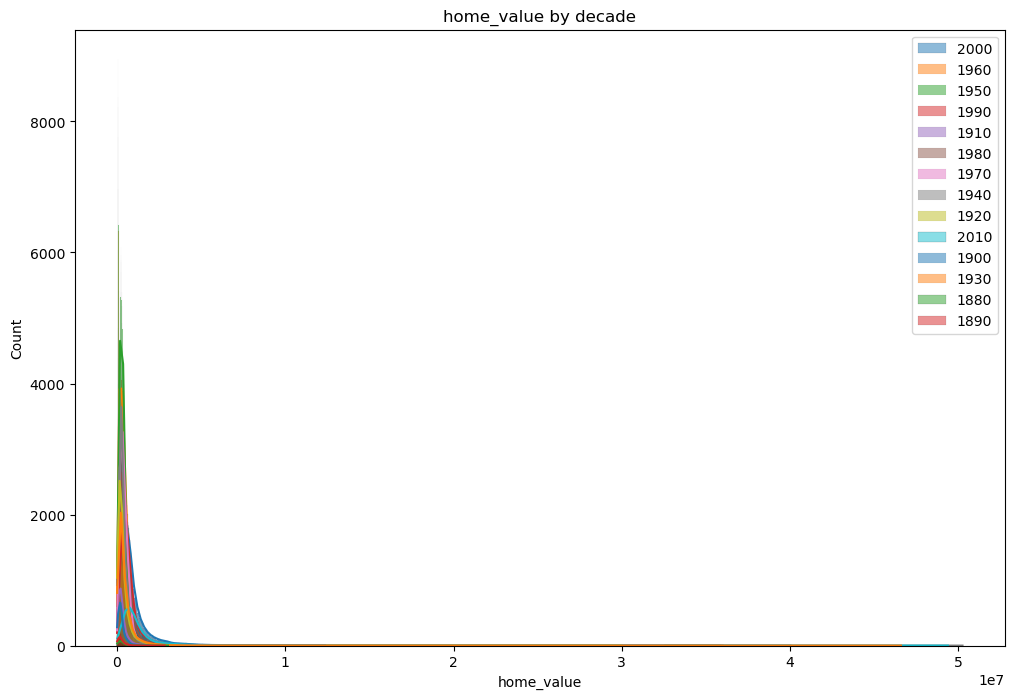

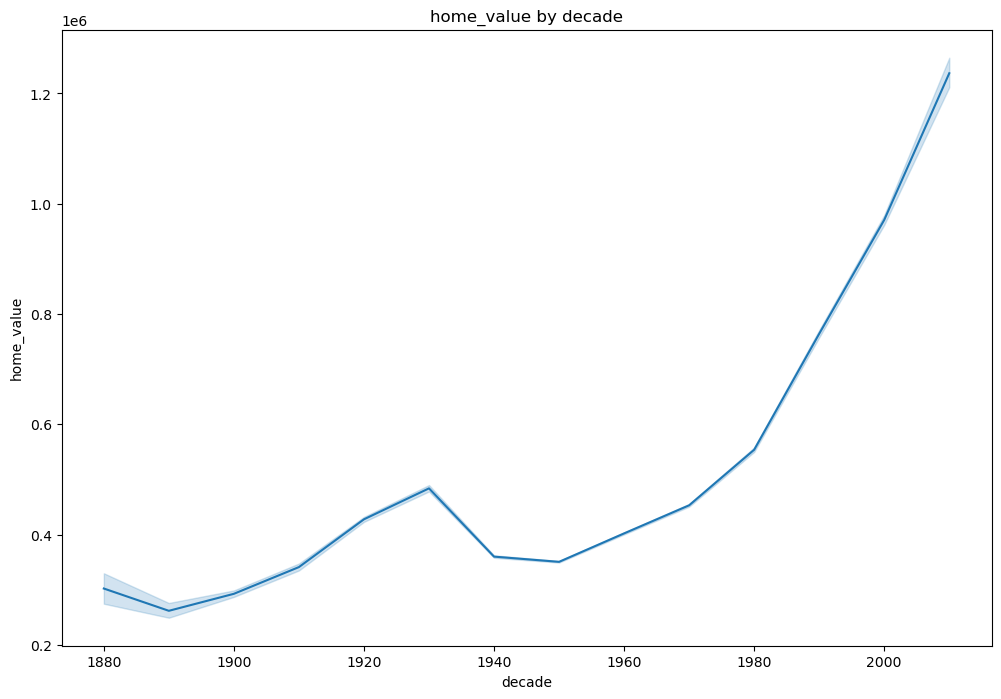

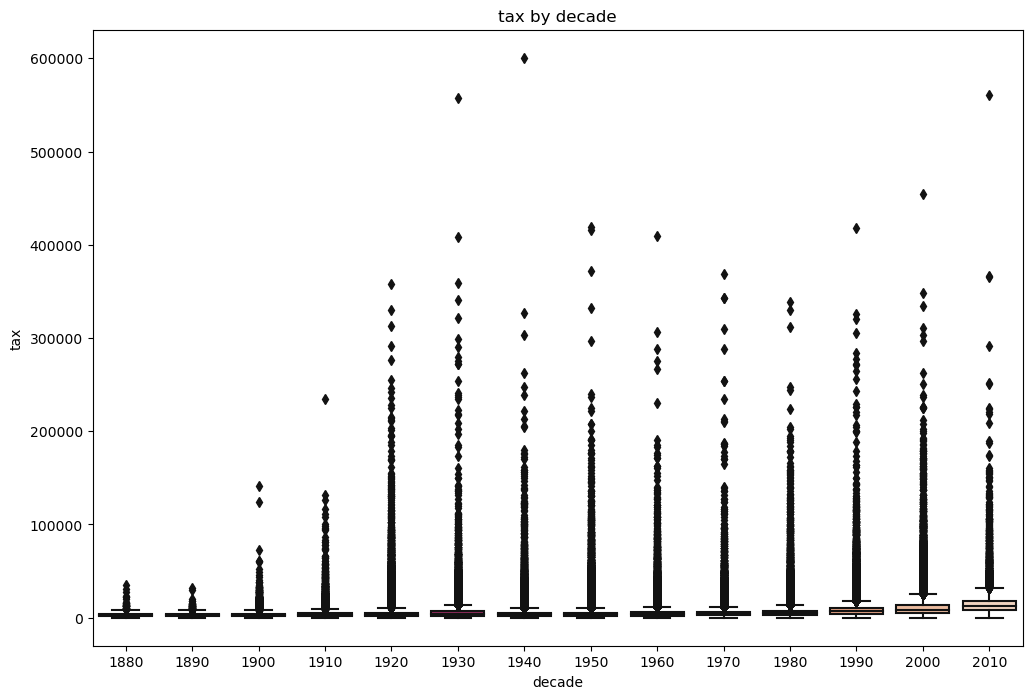

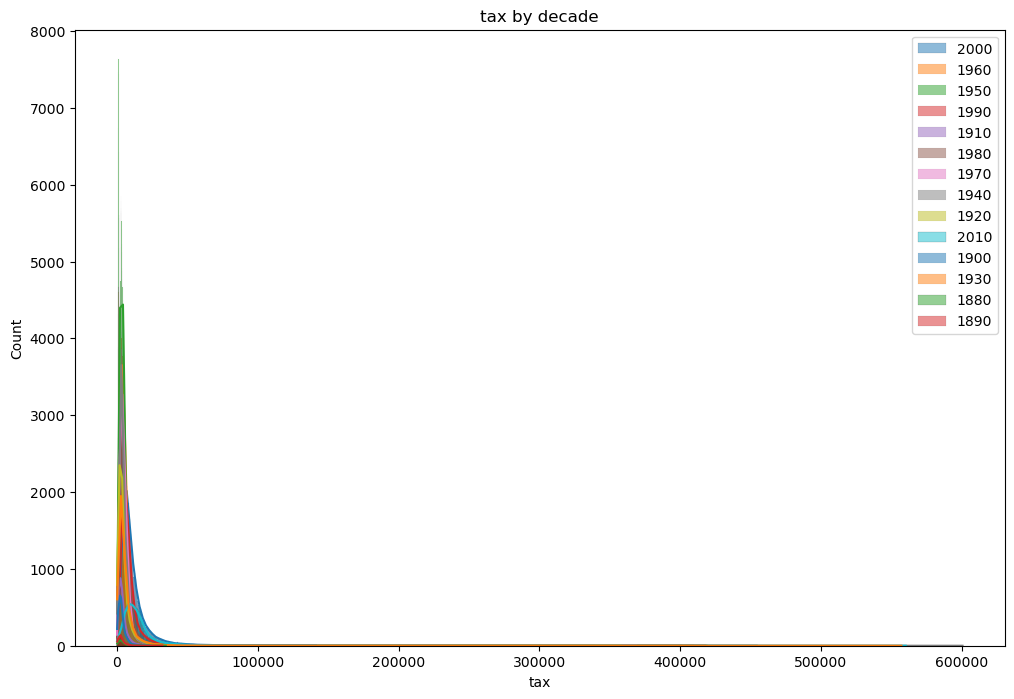

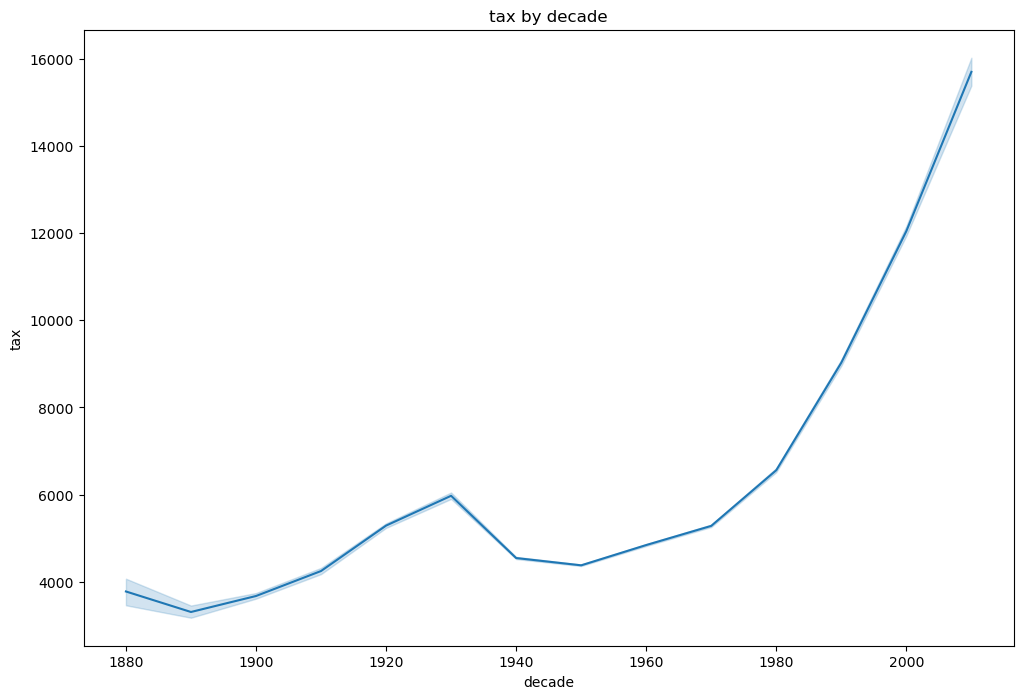

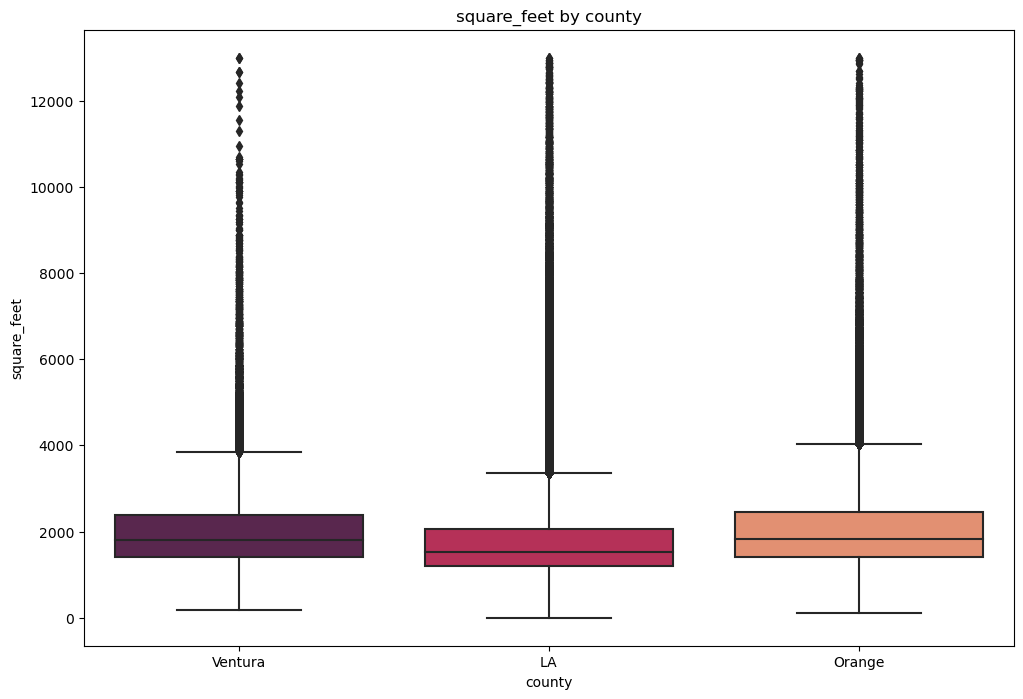

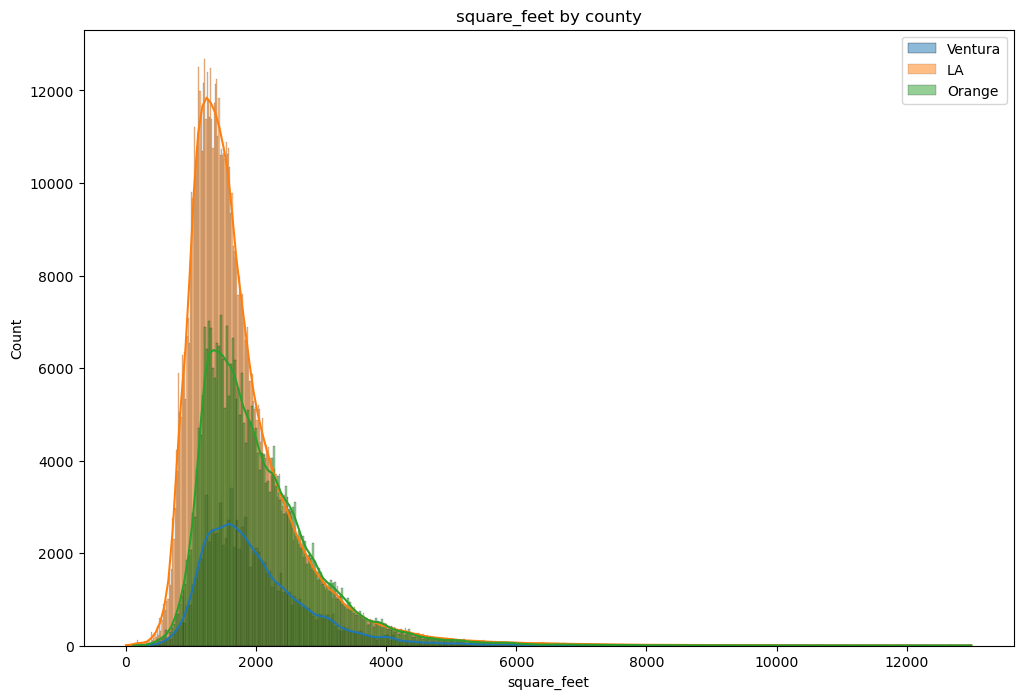

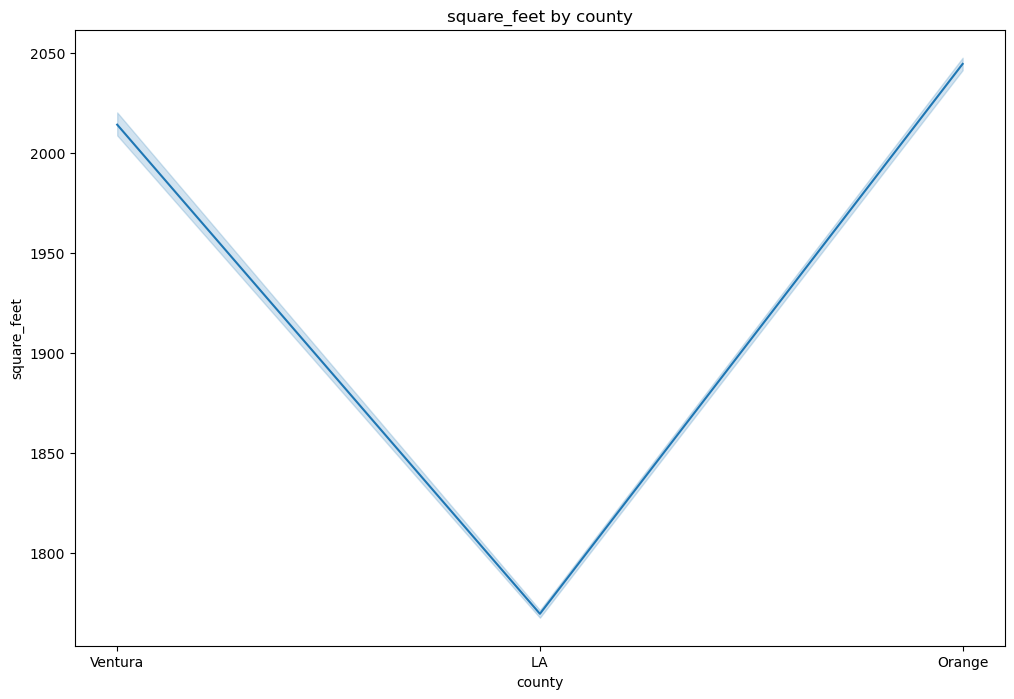

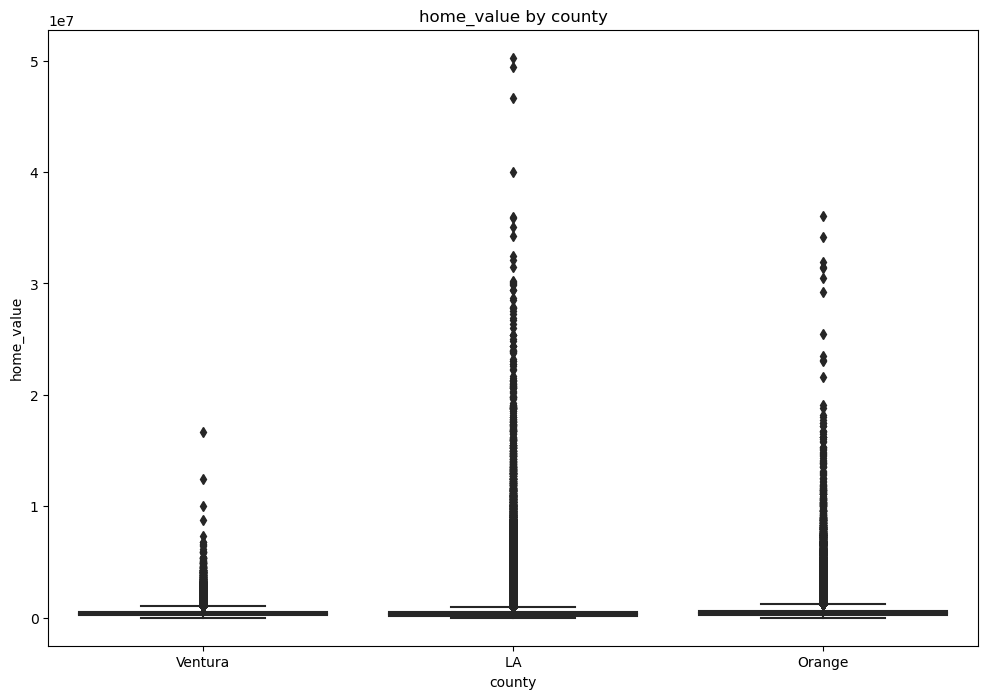

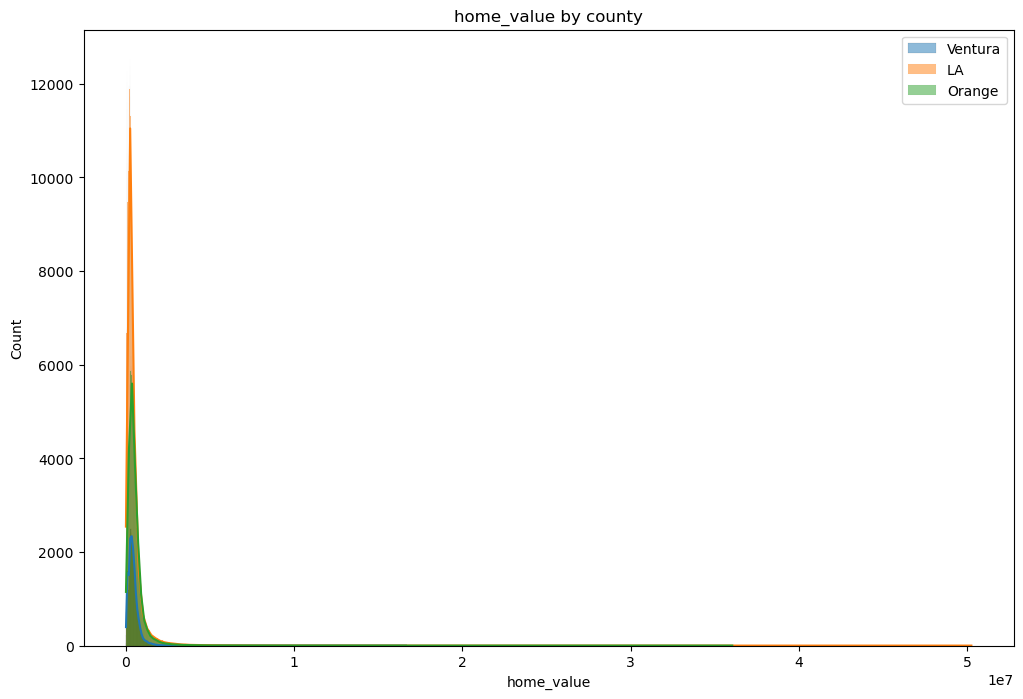

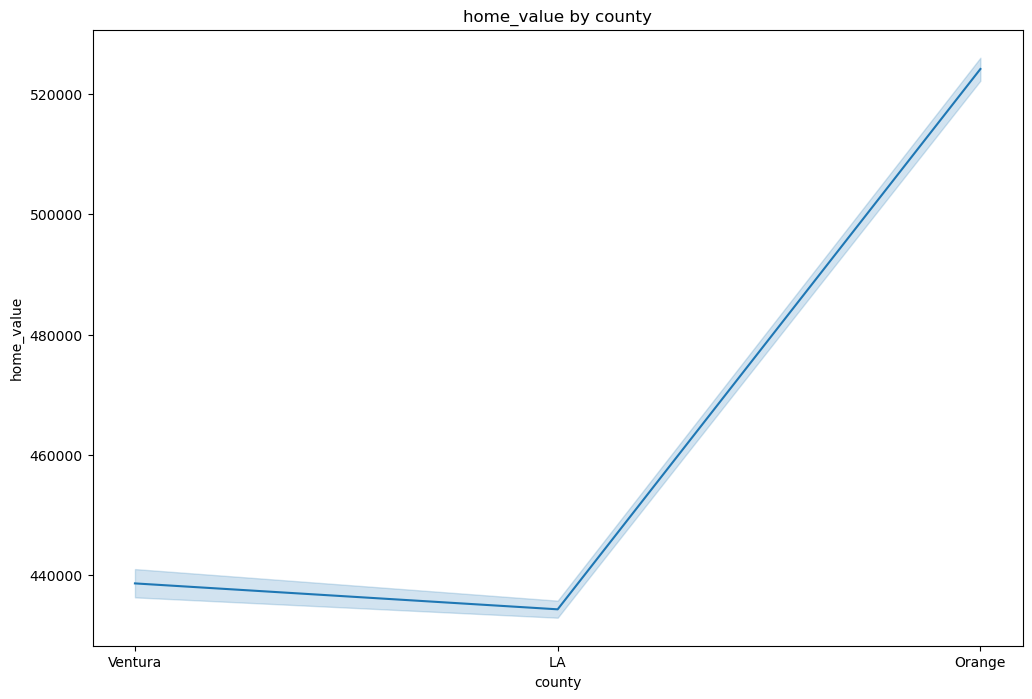

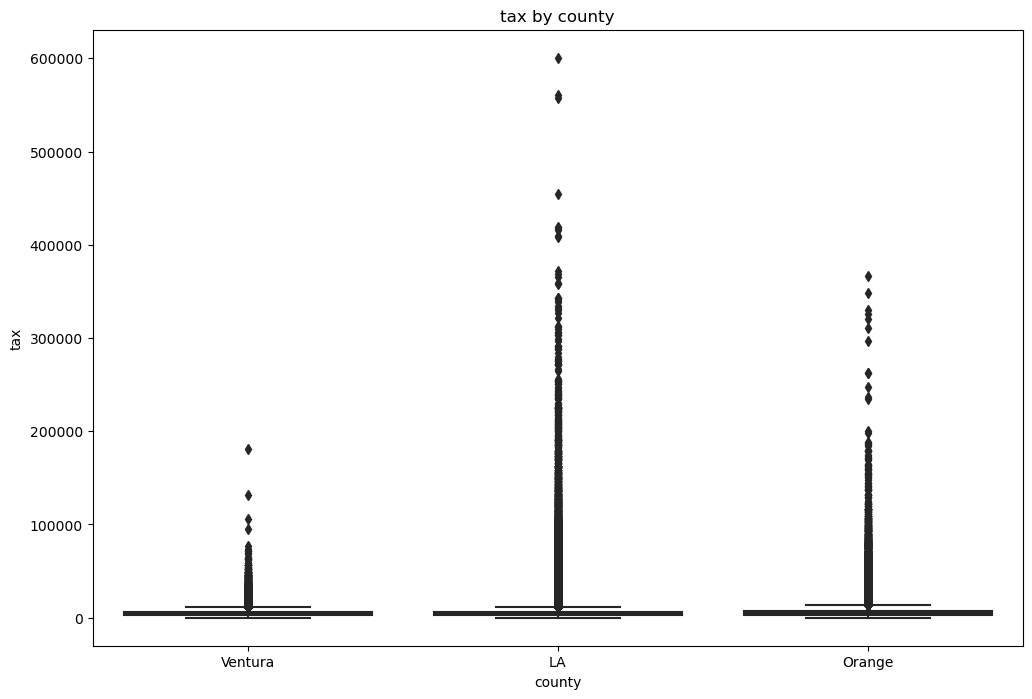

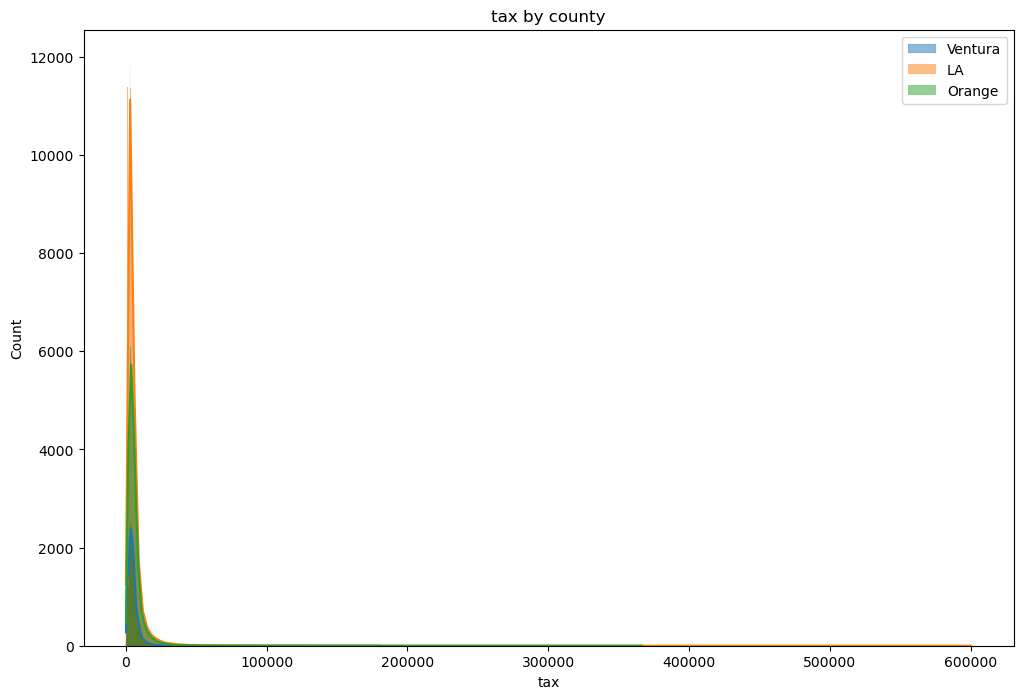

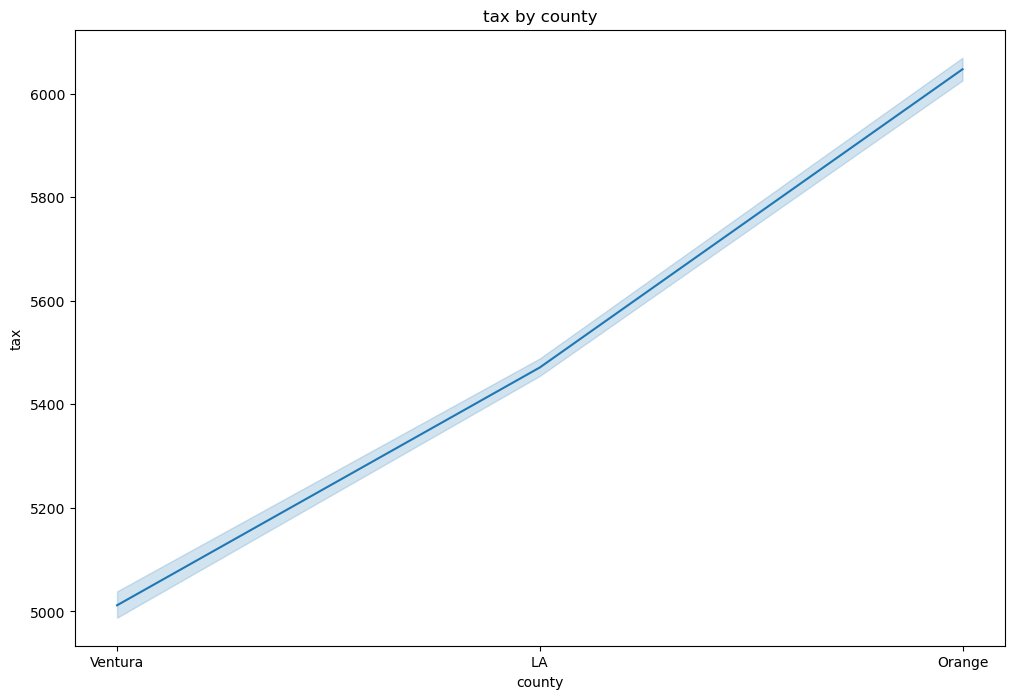

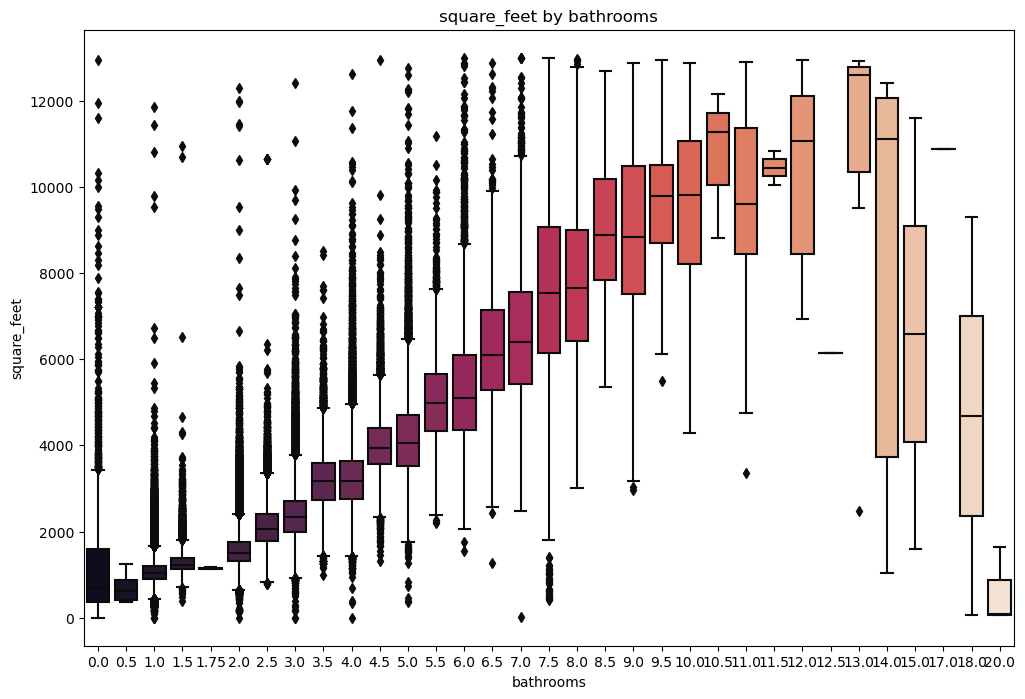

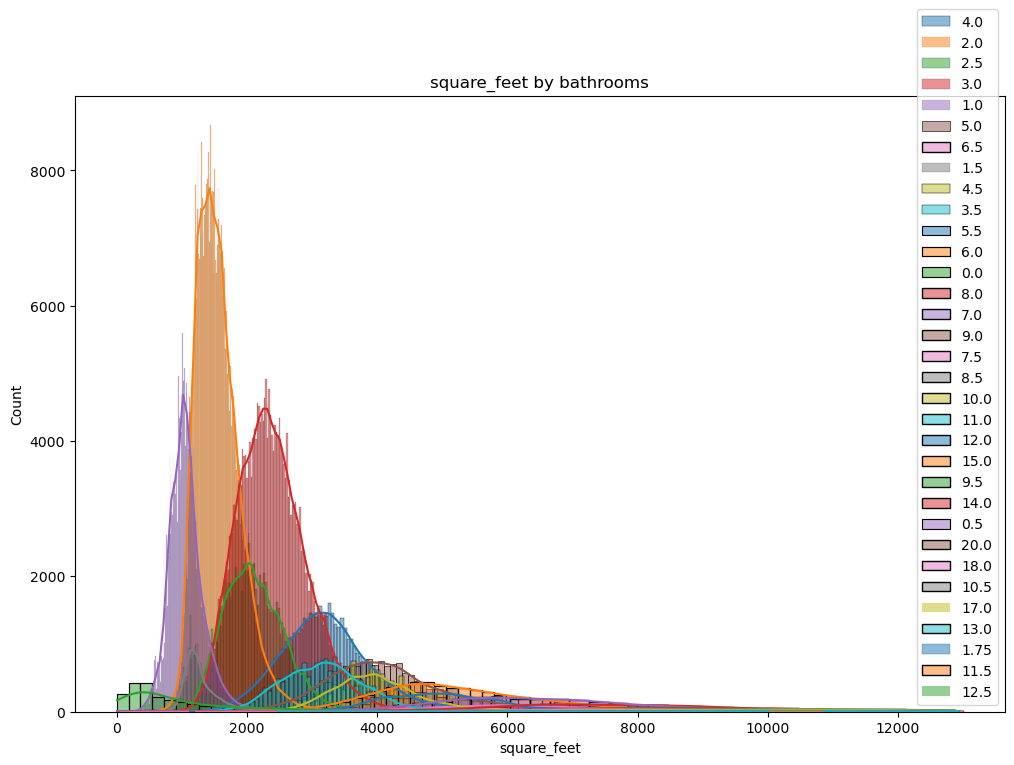

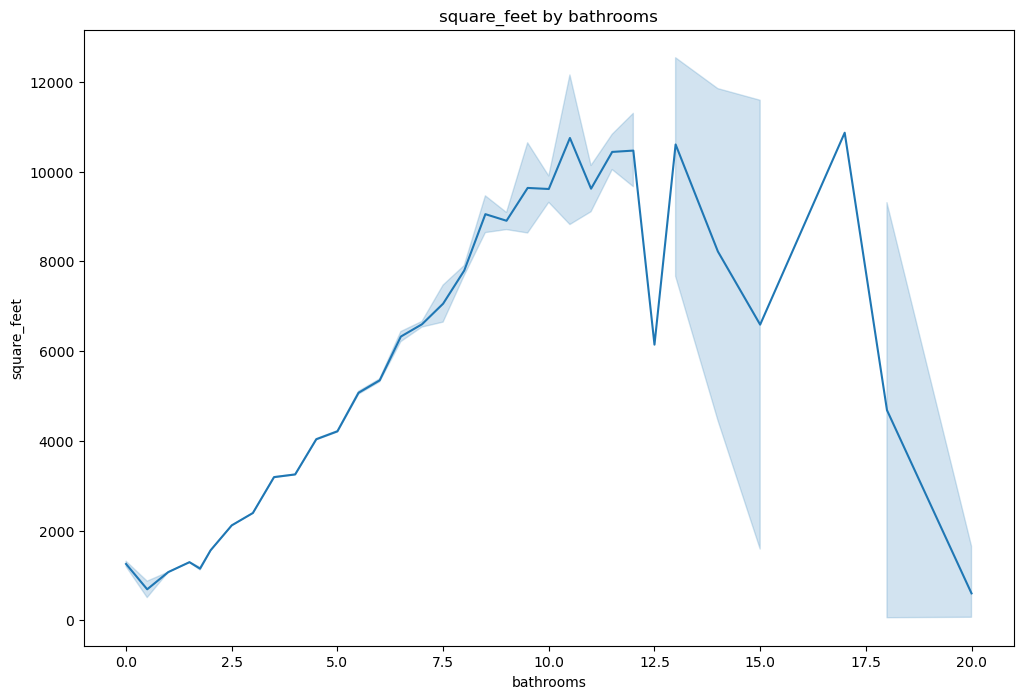

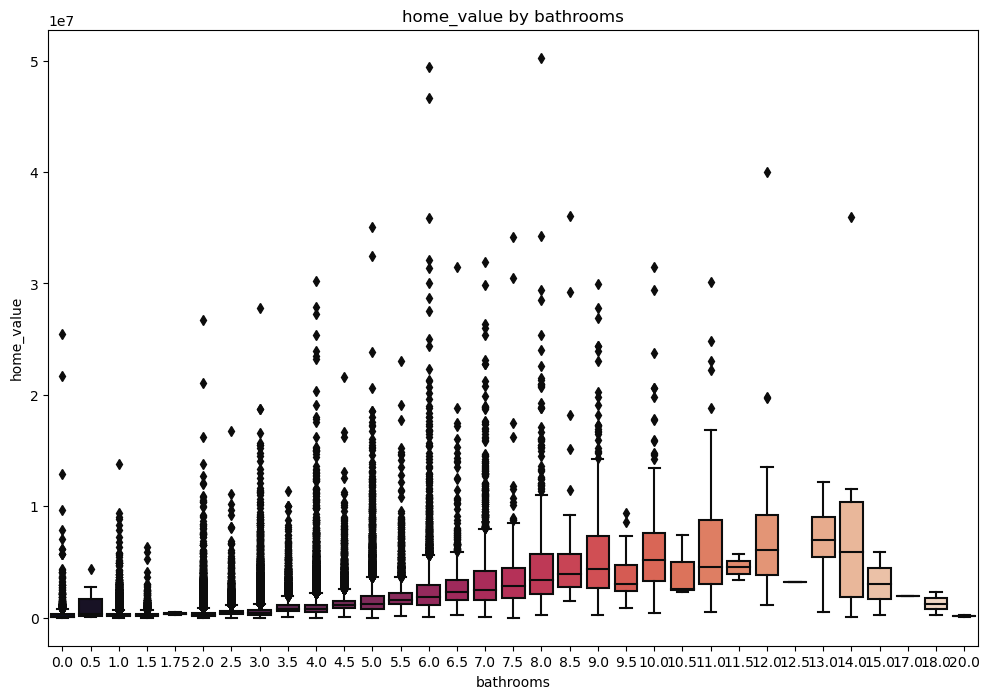

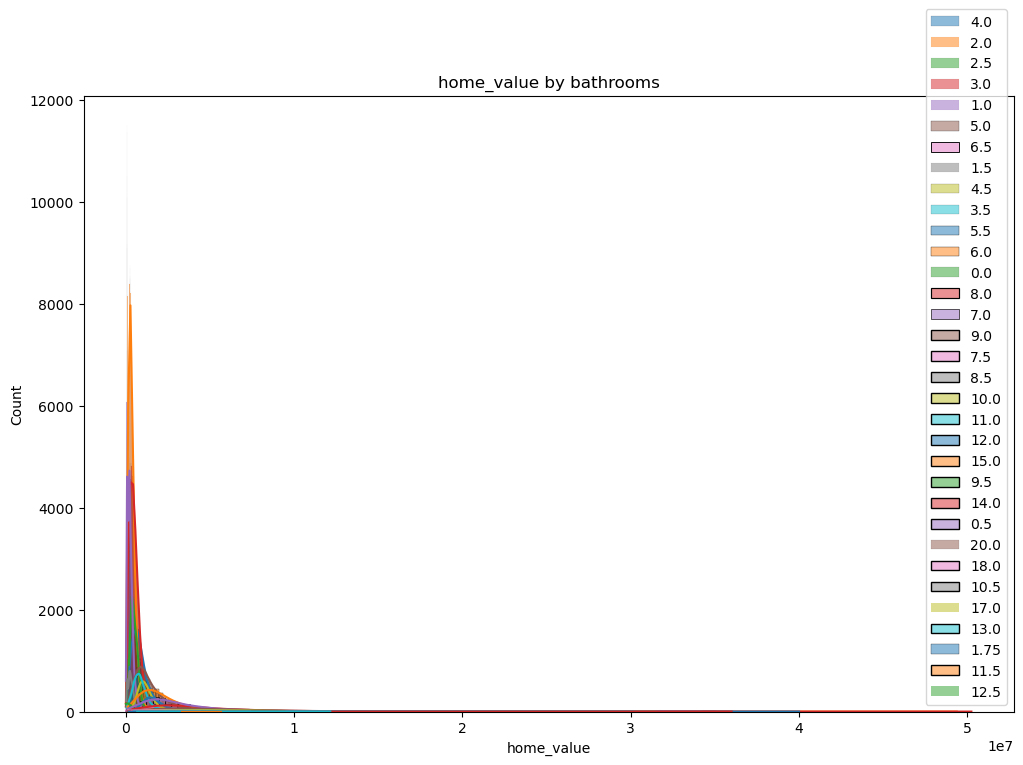

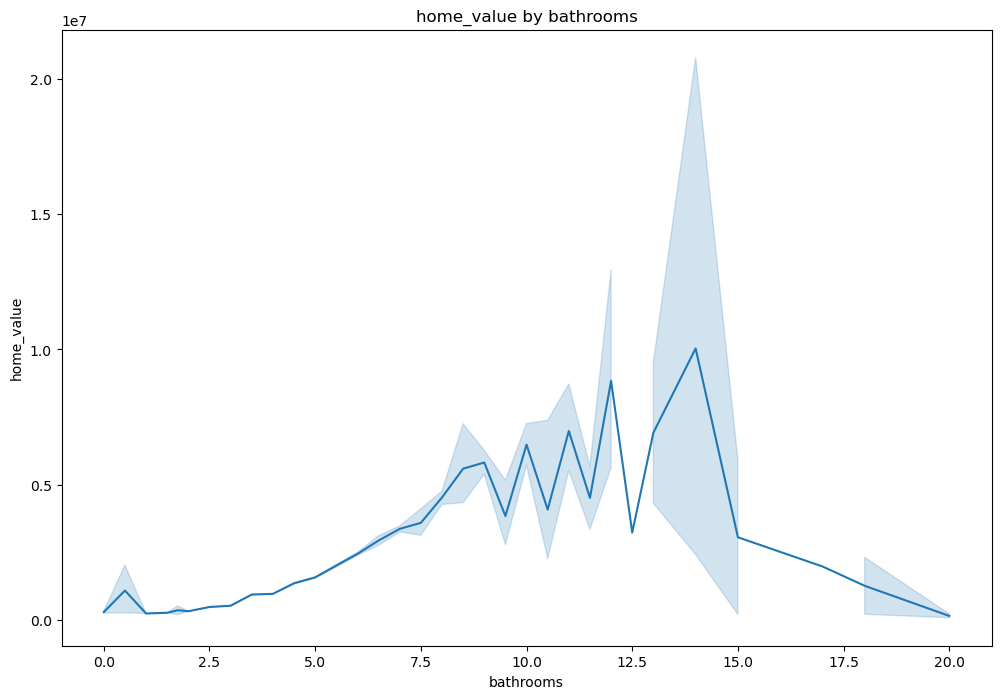

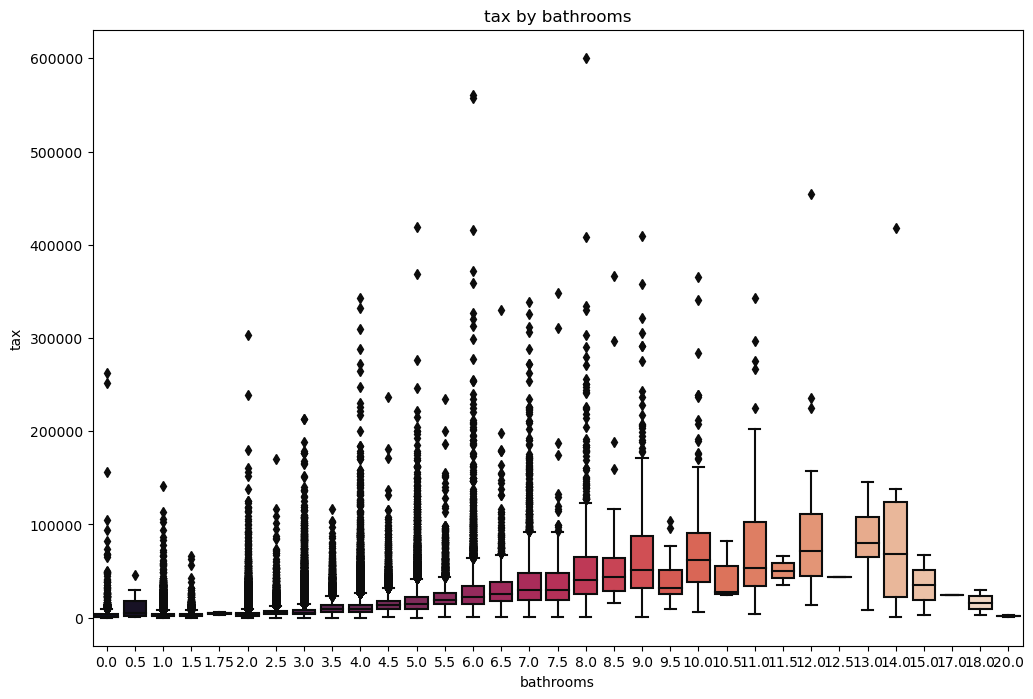

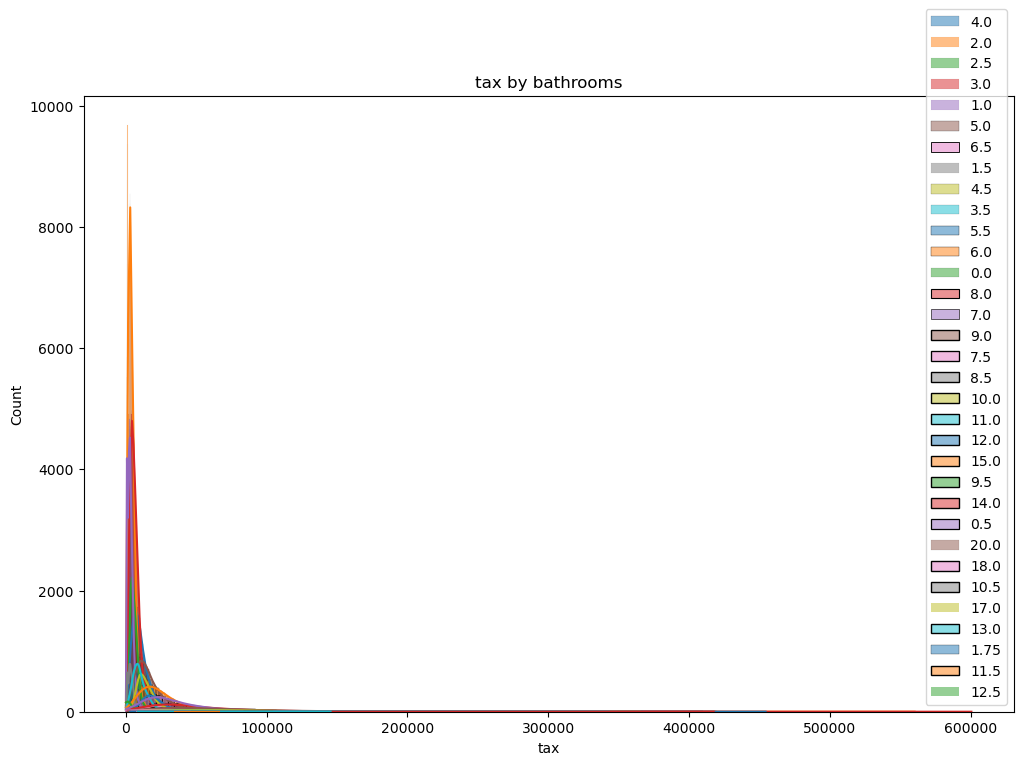

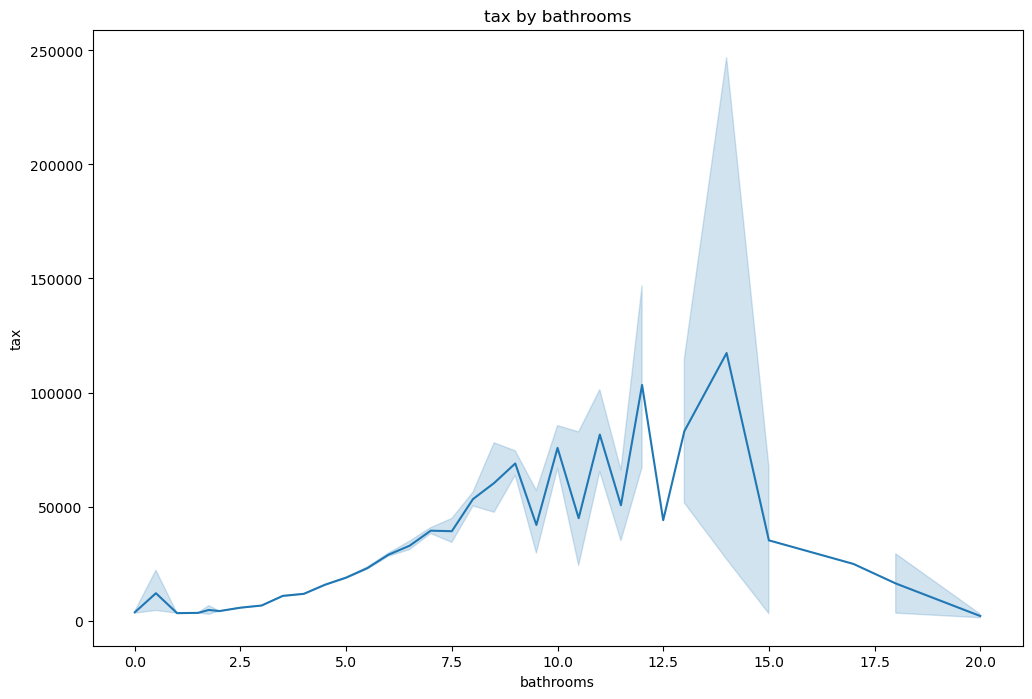

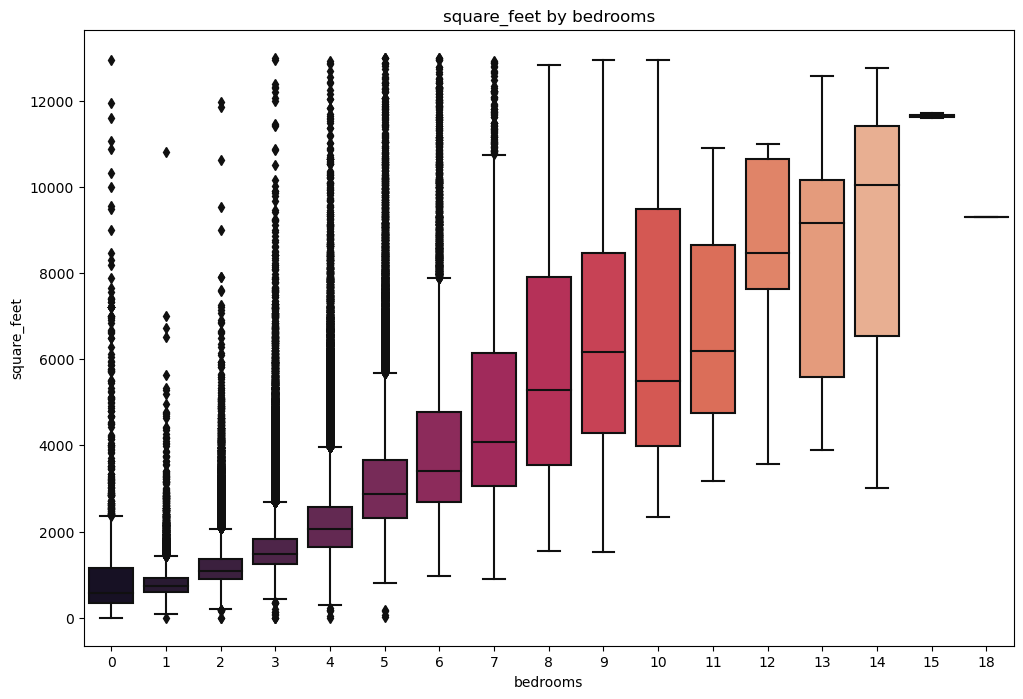

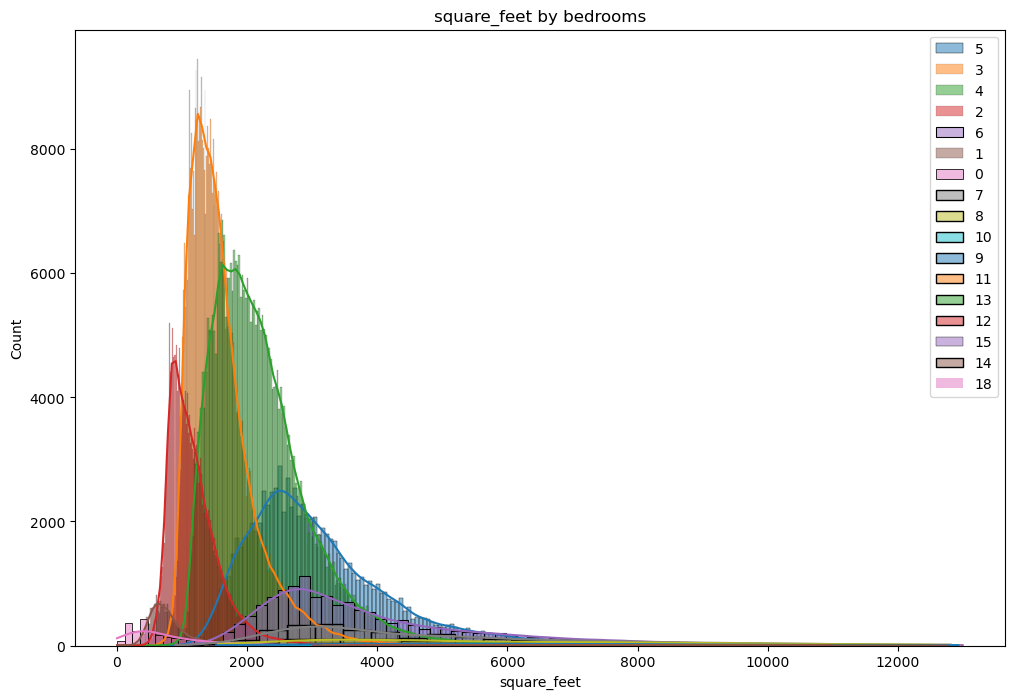

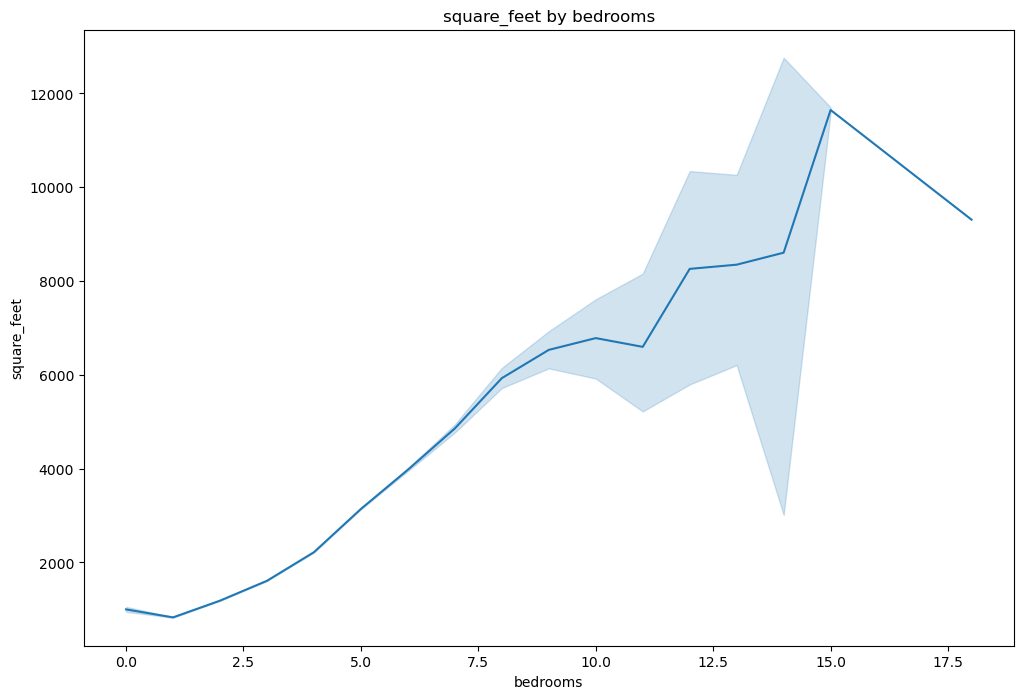

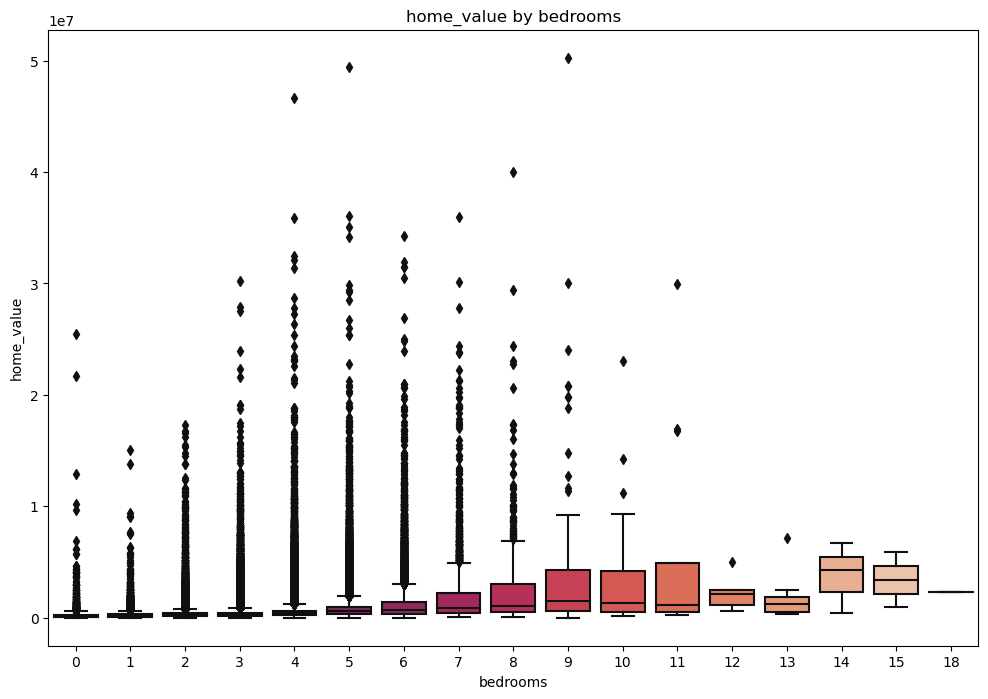

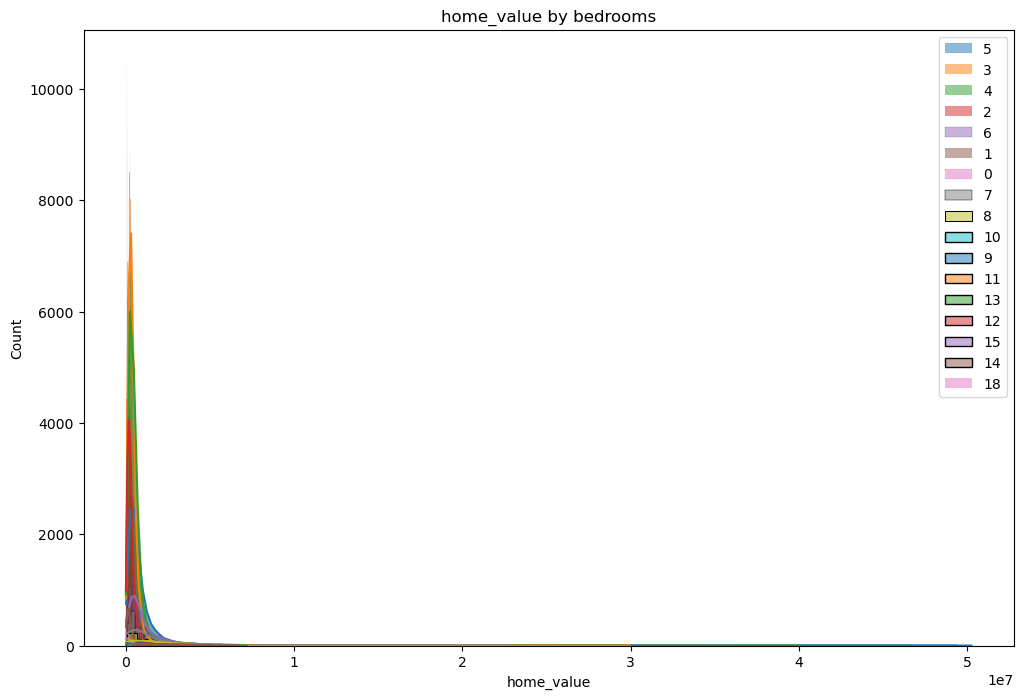

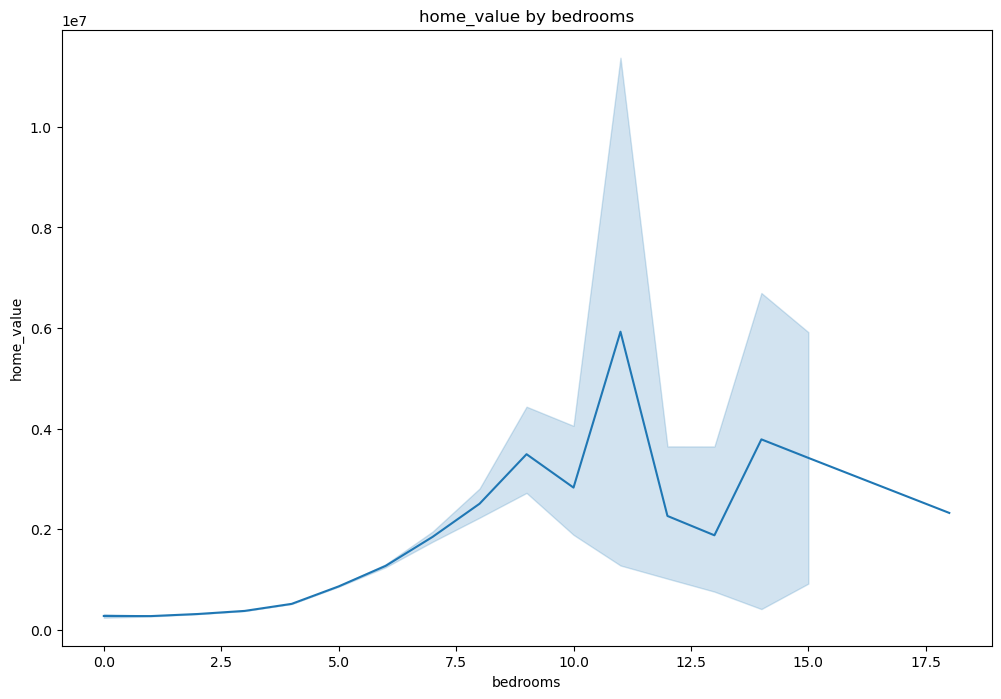

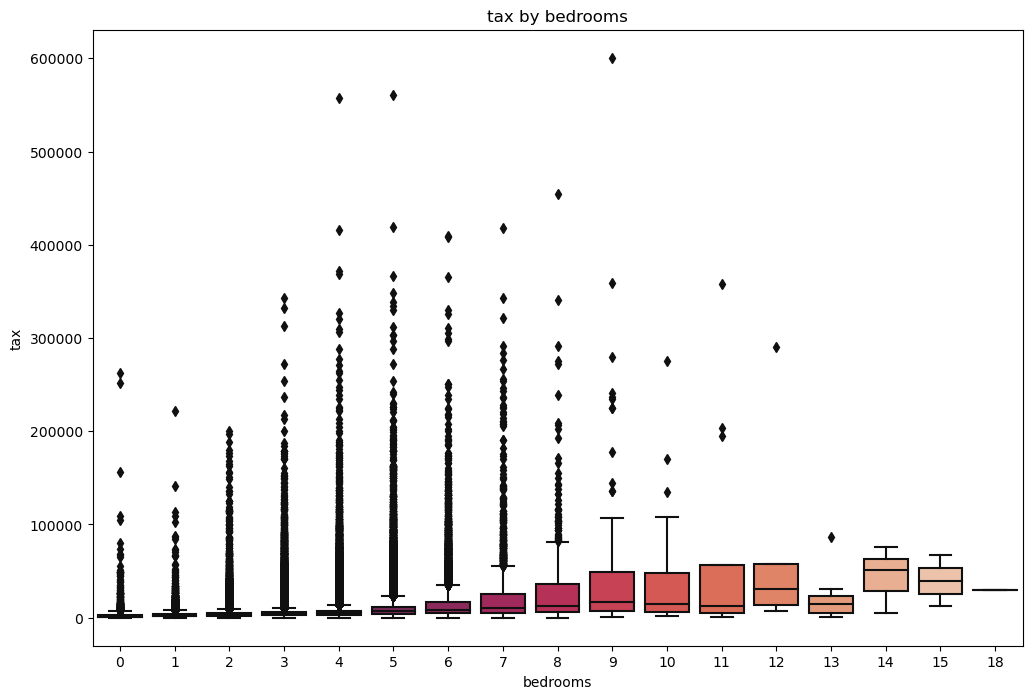

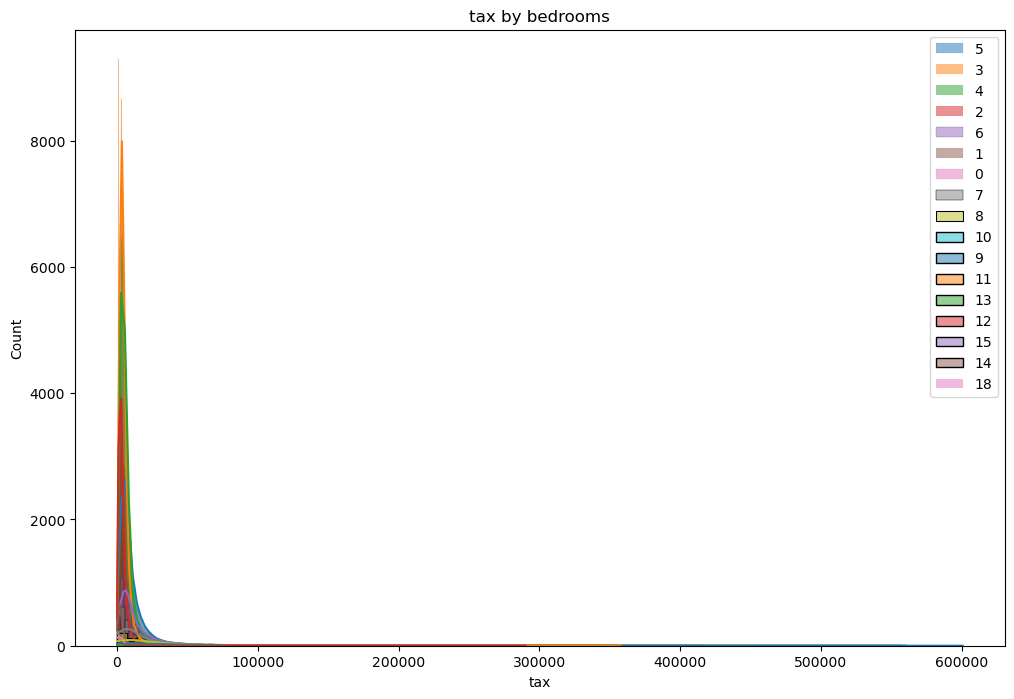

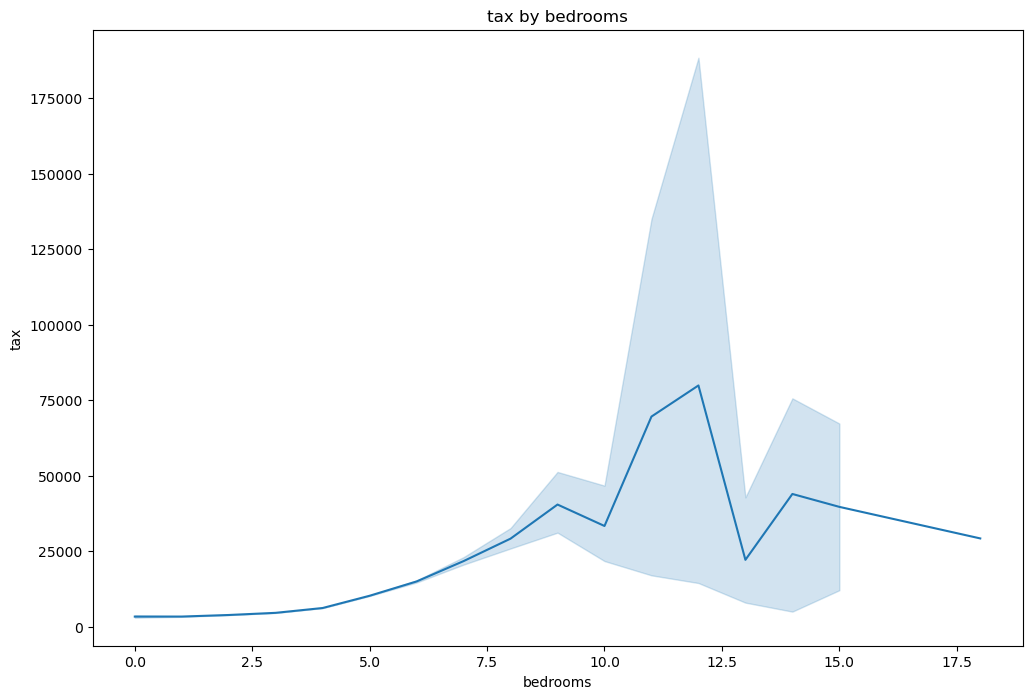

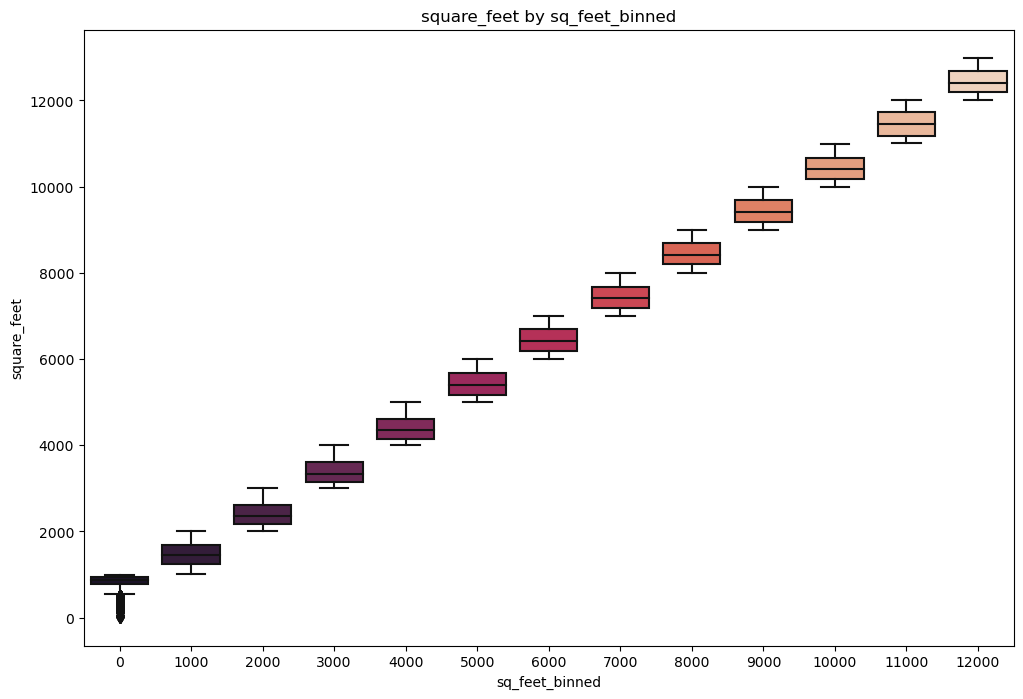

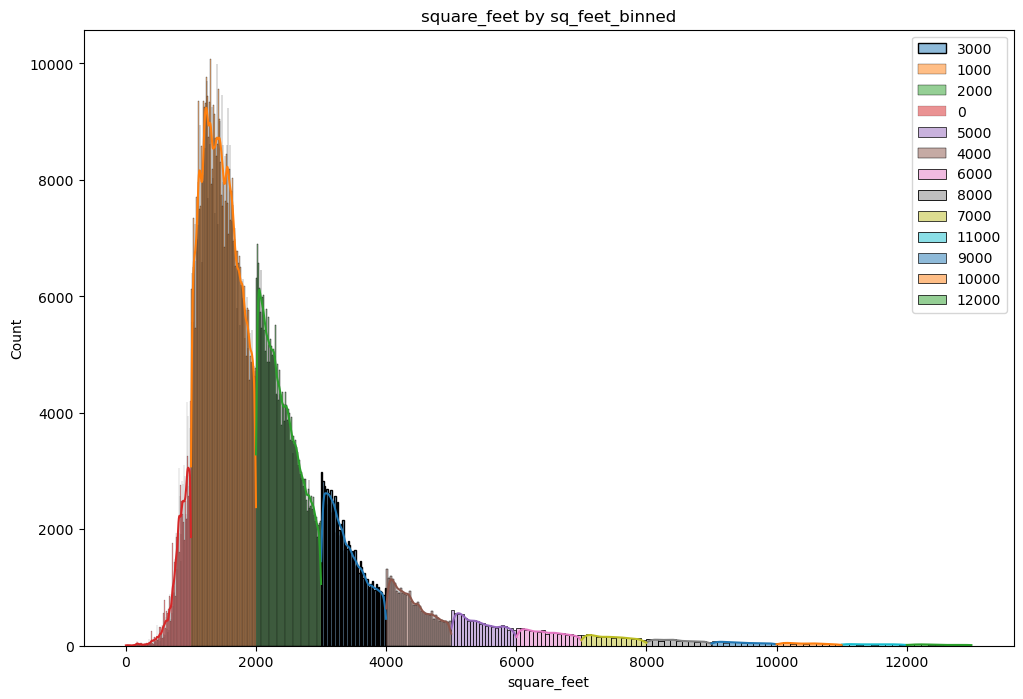

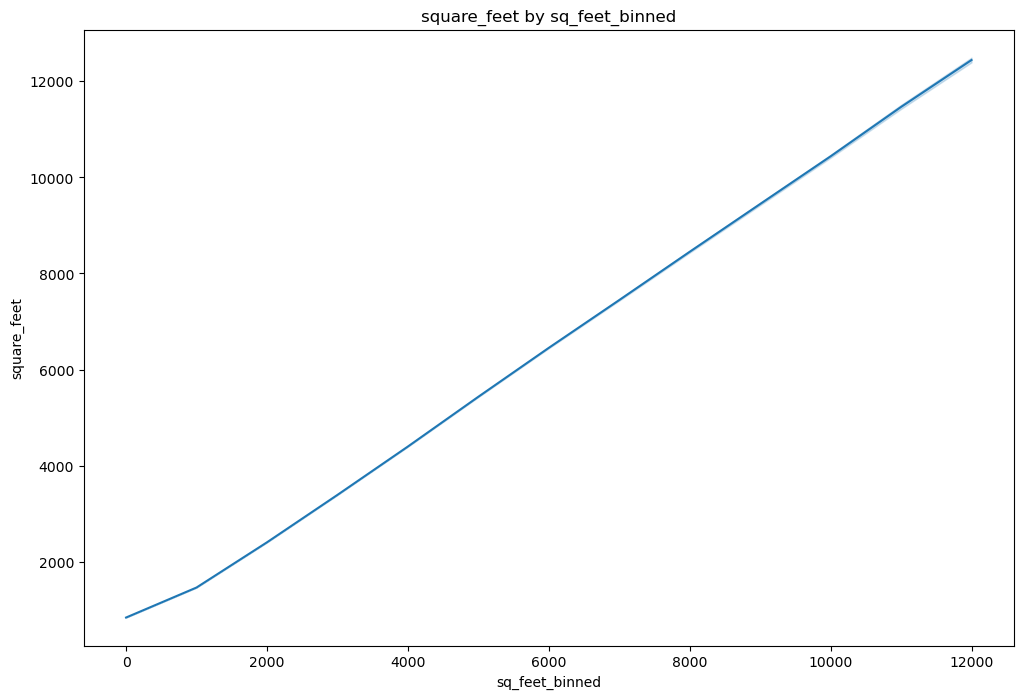

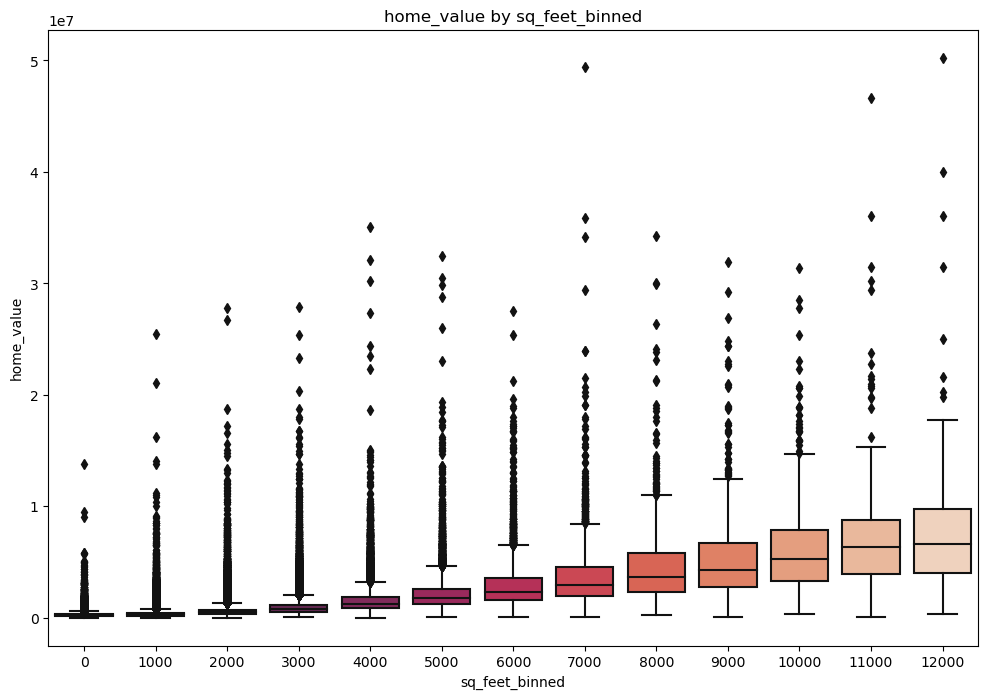

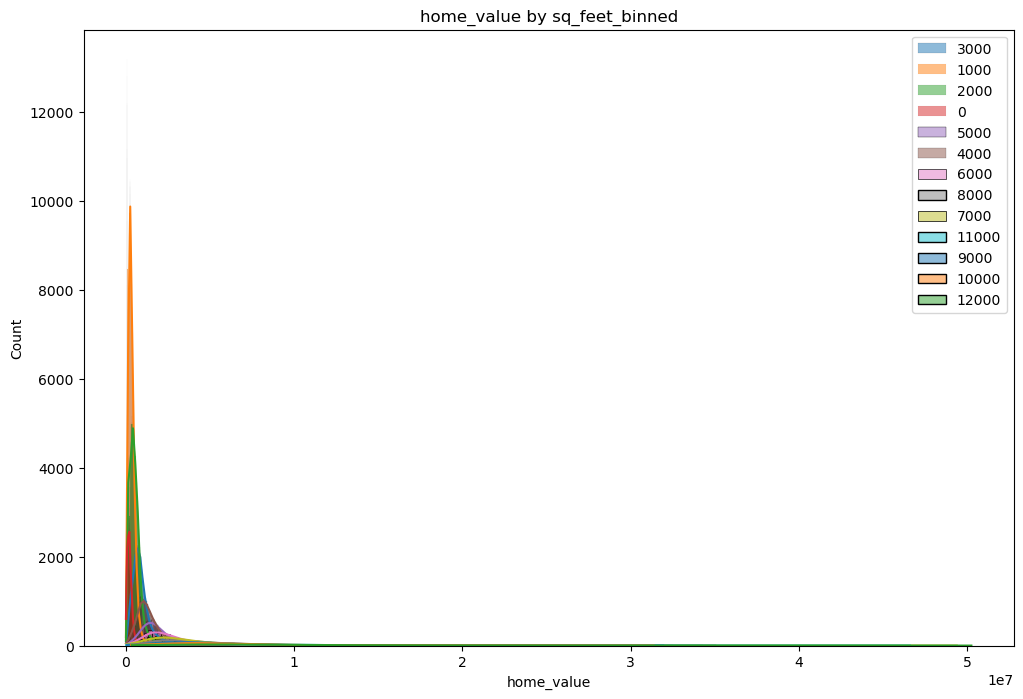

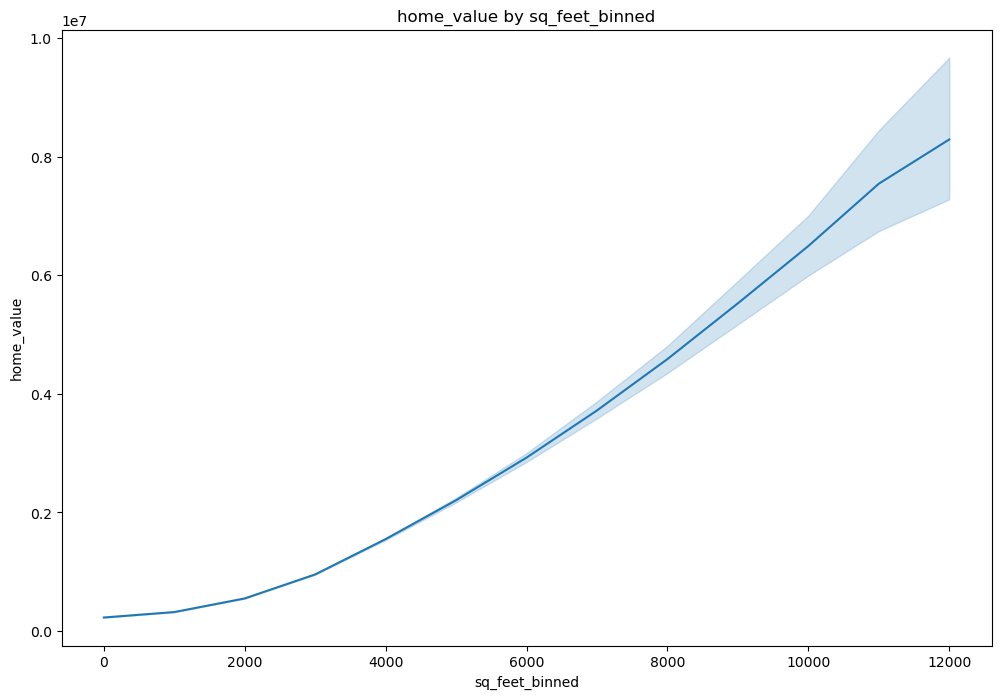

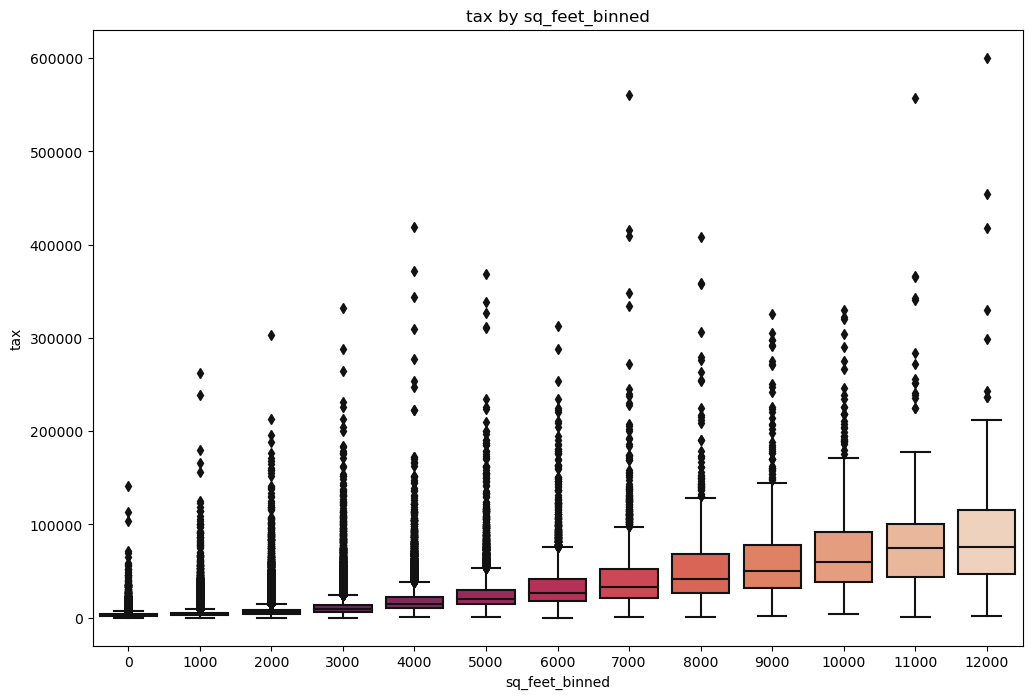

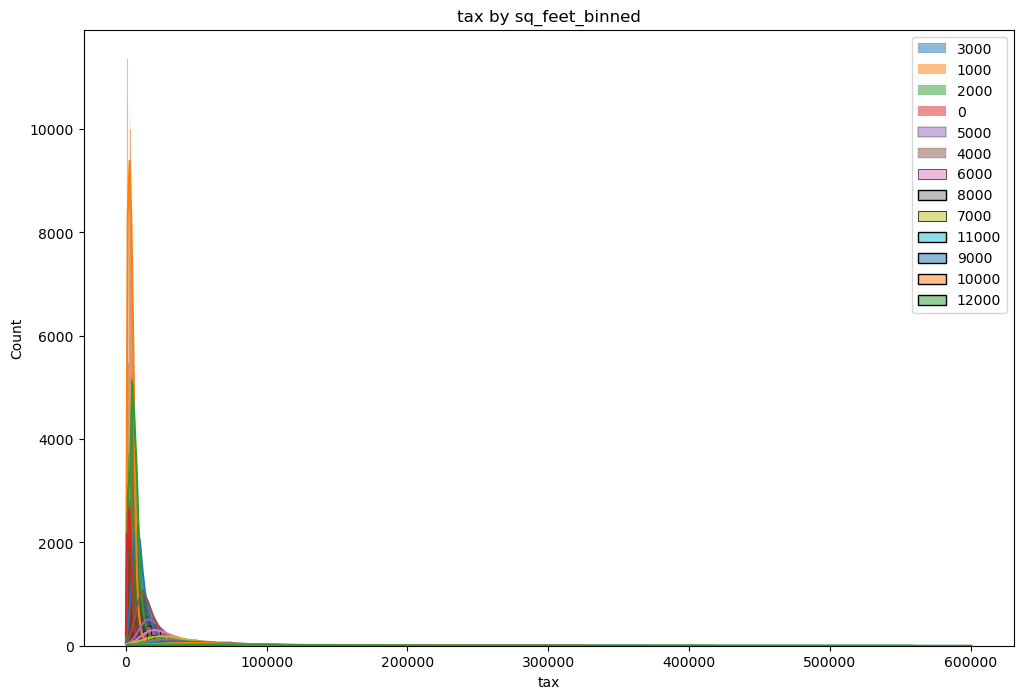

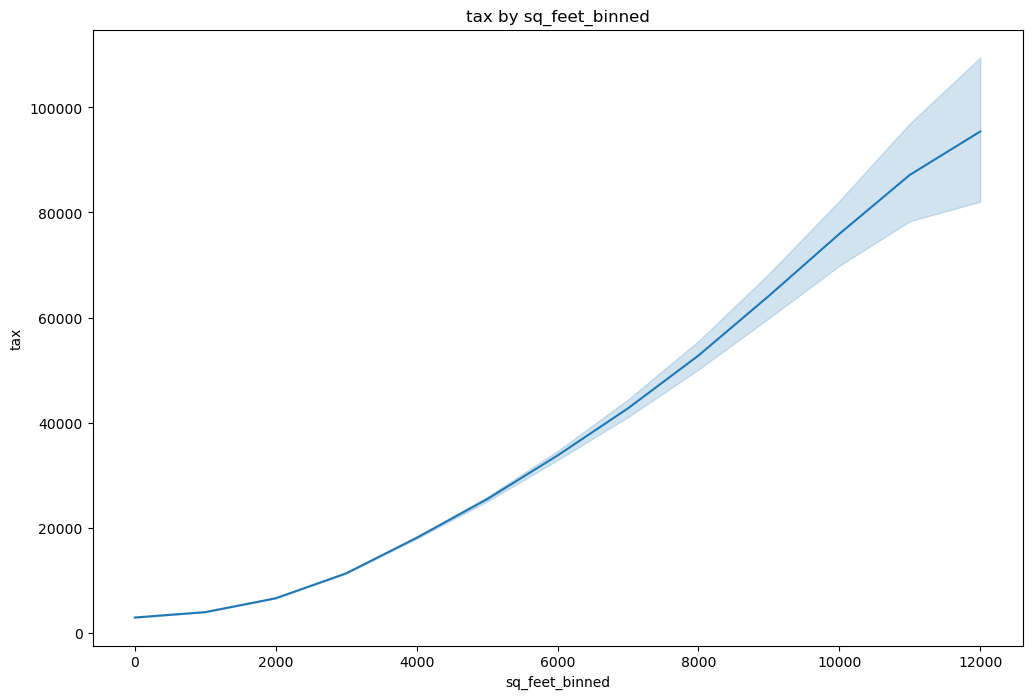

In [59]:
explore.plot_categorical_and_continuous_vars(train, cat, cont)

In [14]:
train.head()

,bedrooms,bathrooms,square_feet,home_value,yearbuilt,tax,county,decade,sq_feet_binned
462820,5,4.0,3011,710674.0,2005,7561.14,Ventura,2000,3000
3880,3,2.0,1682,603333.0,1961,7086.19,LA,1960,1000
992263,4,2.0,1433,82804.0,1954,1134.83,LA,1950,1000
311722,3,2.5,2001,355444.0,1999,4174.92,Ventura,1990,2000
787985,4,2.0,2277,571000.0,1962,7113.02,LA,1960,2000


In [15]:
train.dtypes

bedrooms            int64
bathrooms         float64
square_feet         int64
home_value        float64
yearbuilt           int64
tax               float64
county             object
decade              int64
sq_feet_binned      int64
dtype: object

In [16]:
train.isnull().sum()

bedrooms          0
bathrooms         0
square_feet       0
home_value        0
yearbuilt         0
tax               0
county            0
decade            0
sq_feet_binned    0
dtype: int64

## 3. Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.


In [81]:
#explore.plot_categorical_and_continuous_vars(train, cat, cont)

## 4. Use the functions you created above to explore your Zillow train dataset in your explore.ipynb notebook.


>See above

## 5. Come up with some initial hypotheses based on your goal of predicting property value.


**First question: Does county affect property value?**

$H_0$: There is NO correlation between the county and the property value.\
$H_a$: There IS a correlation between the county and the property value.

<hr style="border:2px solid black">

**Second question: Does square feet affect property value?**

$H_0$: There is NO correlation between the square feet and the property value.\
$H_a$: There IS a correlation between the square feet and the property value.

<hr style="border:2px solid black">

**Third question: Does bathroom count affect property value?**

$H_0$: There is NO correlation between the amount of bathrooms and the property value.\
$H_a$: There IS a correlation between the amount of bathrooms and the property value.

<hr style="border:2px solid black">

## 6. Visualize all combinations of variables in some way.


<div class = "alert alert-block alert-success">
Visualizing the correlation between bedrooms and home value using a lmplot and a line plot since it is showing the correlation of a continuous variable by a continuous variable.

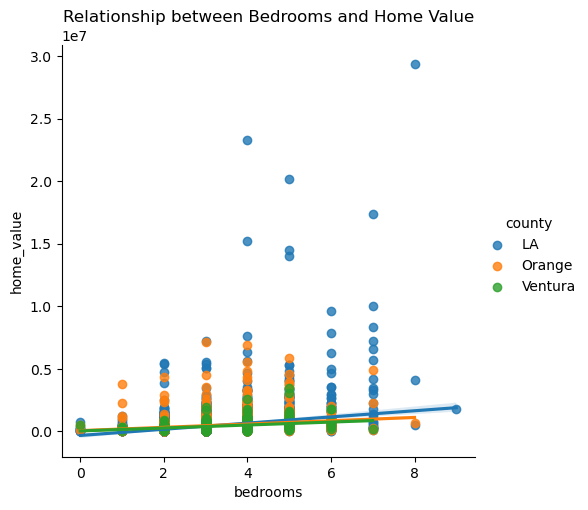

In [23]:
sns.lmplot(data=train.sample(10_000),x='bedrooms',y='home_value',hue='county')

plt.title('Relationship between Bedrooms and Home Value')

plt.show()


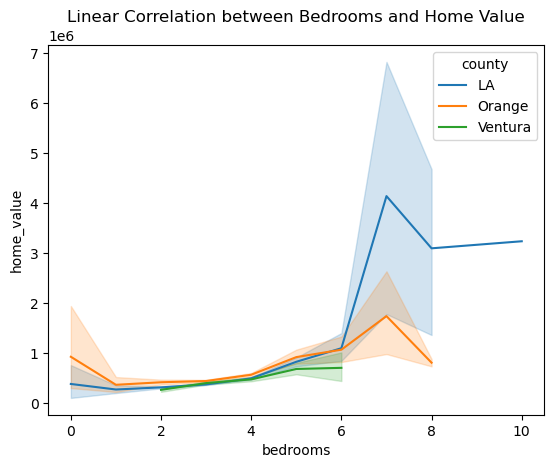

In [24]:
sns.lineplot(train.sample(10_000), x='bedrooms',y='home_value', hue='county')
plt.title('Linear Correlation between Bedrooms and Home Value')

plt.show()

<hr style="border:2px solid black">

<div class = "alert alert-block alert-success">
Visualizing the correlation between square feet and home value using a lmplot and a line plot since it is showing the correlation of a continuous variable by a continuous variable.

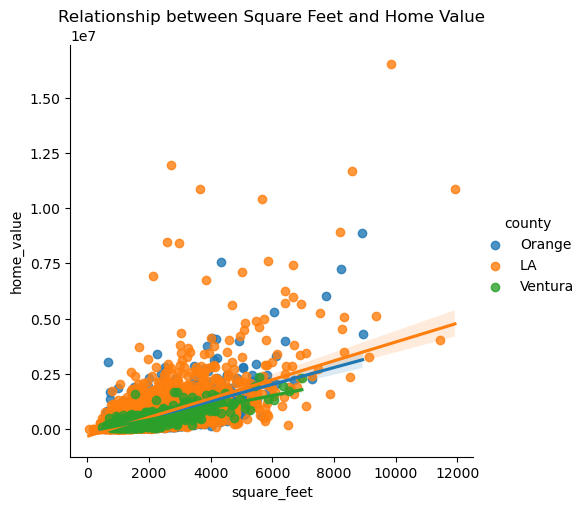

In [42]:
sns.lmplot(data=train.sample(10_000),x='square_feet',y='home_value',hue='county')

plt.title('Relationship between Square Feet and Home Value')

plt.show()


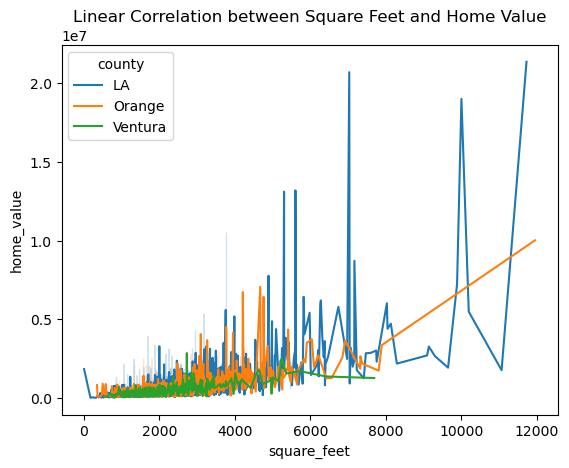

In [43]:
sns.lineplot(train.sample(10_000), x='square_feet',y='home_value', hue='county')
plt.title('Linear Correlation between Square Feet and Home Value')

plt.show()

<hr style="border:2px solid blue">

<div class = "alert alert-block alert-success">
Visualizing the correlation between county and home value using a barplot and a box plot since it is showing the distribution of a continuous variable by a discrete variable.

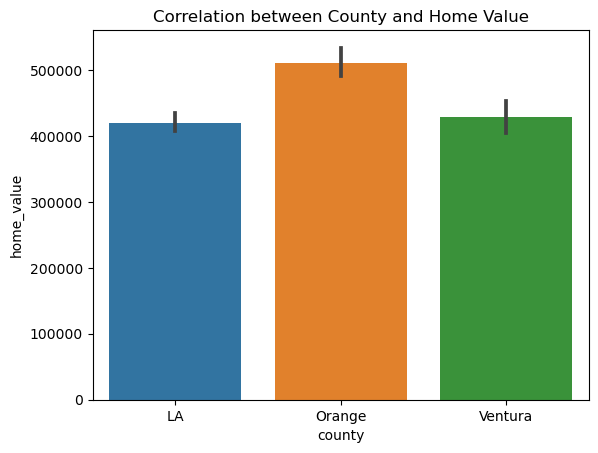

In [77]:
sns.barplot(y='home_value', x='county', data=train.sample(10_000));
plt.title('Correlation between County and Home Value')

plt.show()

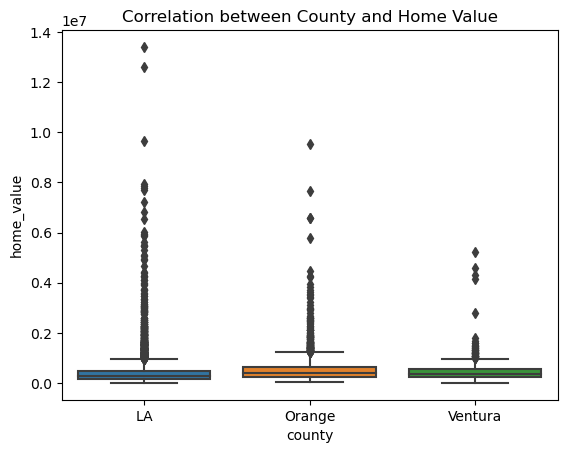

In [48]:
sns.boxplot(y='home_value', x='county', data=train.sample(10_000))
plt.title('Correlation between County and Home Value')

plt.show()

7. Run the appropriate statistical tests where needed.


<div class = "alert alert-block alert-success">
Running a spearmanr test for the correlation between bedrooms and home value.

In [36]:
α = 0.05

In [37]:
r , p = spearmanr(train.bedrooms, train.home_value)

In [38]:
if p < α:
    print('We can reject our null hypothesis and suggest that there is a linear correlation')
else:
    print('We fail to reject the null hypothesis')

We can reject our null hypothesis and suggest that there is a linear correlation


In [39]:
r, p

(0.29483938977710483, 0.0)

<div class = "alert alert-block alert-success">
Running a spearmanr test for the correlation between square feet and home value.

In [51]:
α = 0.05

In [52]:
r , p = spearmanr(train.square_feet, train.home_value)

In [53]:
if p < α:
    print('We can reject our null hypothesis and suggest that there is a linear correlation')
else:
    print('We fail to reject the null hypothesis')

We can reject our null hypothesis and suggest that there is a linear correlation


In [54]:
r, p

(0.5233281067616459, 0.0)

<div class = "alert alert-block alert-success">
Running a spearmanr test for the correlation between county and home value.

In [55]:
α = 0.05

In [78]:
r , p = spearmanr(train.county, train.home_value)

In [79]:
if p < α:
    print('We can reject our null hypothesis and suggest that there is a linear correlation')
else:
    print('We fail to reject the null hypothesis')

We can reject our null hypothesis and suggest that there is a linear correlation


In [80]:
r, p

(0.15018969164987503, 0.0)

8. What independent variables are correlated with the dependent variable, home value?


>county, tax, square feet, year built, bedrooms, bathrooms

9. Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?


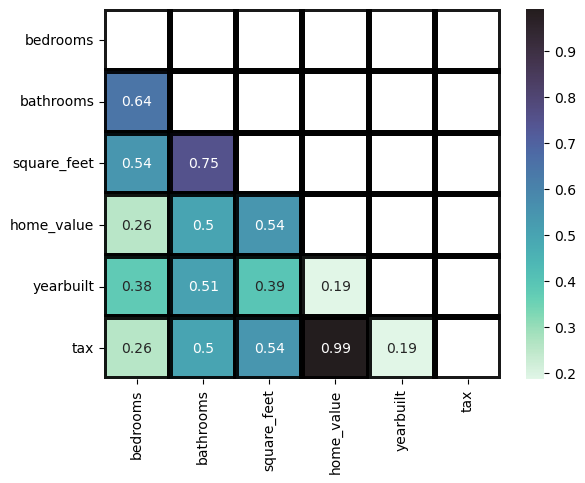

In [72]:
kwargs = {'alpha':.9,'linewidth':3, 'linestyle':'-', 
          'linecolor':'k','rasterized':False, 'edgecolor':'w', 
          'capstyle':'projecting',}
sns.heatmap(zillow_corr, cmap='mako_r', annot=True, mask= np.triu(zillow_corr), **kwargs);

>square feet & bathrooms, square feet & bedrooms, bathrooms & bedrooms, square feet & tax

10. Make sure to document your takeaways from visualizations and statistical tests as well as the decisions you make throughout your process.


>Markdowns and notes with the code listed above

11. Explore your dataset with any other visualizations you think will be helpful.

>Various visualizations above